## Dataset Statisitcal Analysis

In [113]:
from utils import *
from chess_feature_extractors import *
import matplotlib.pyplot as plt
from IPython.display import SVG, display
import chess.svg
board_feats_disagreements = pd.read_csv("./disagreement_df.csv")
games_df = pd.read_csv("./Maia-Leela-Stock-empiricalQ.csv")
unique_games_df = games_df.drop_duplicates(subset='game')
grouped_df = unique_games_df.groupby('game')['result'].value_counts().unstack(fill_value=0)
total_wins = grouped_df['win'].sum()
total_losses = grouped_df['lose'].sum()
total_draws = grouped_df['draw'].sum()
win_percent = total_wins / (total_wins + total_draws + total_losses) * 100
print(f"Total wins number: {total_wins}\n"
      f"Total losses number: {total_losses}\n"
      f"Total draws number: {total_draws}")
print(f"Win percent: {win_percent.__round__(3)}%")

Total wins number: 7405
Total losses number: 604
Total draws number: 486
Win percent: 87.169%


In [114]:
grouped_df = games_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
grouped_df['moves_num'] = grouped_df['agreed'] + grouped_df['leela10b2500'] + grouped_df['maia1200'] + grouped_df['random']
grouped_df['agreed_percent'] = ((grouped_df['agreed'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['random_percent'] = ((grouped_df['random'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['leela_percent'] = ((grouped_df['leela10b2500'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['maia_percent'] = ((grouped_df['maia1200'] / grouped_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in a game: {grouped_df['agreed_percent'].mean().__round__(3)}%, variance: {grouped_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in a game: {grouped_df['random_percent'].mean().__round__(3)}%, variance: {grouped_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in a game: {grouped_df['leela_percent'].mean().__round__(3)}%, variance: {grouped_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in a game: {grouped_df['maia_percent'].mean().__round__(3)}%, variance: {grouped_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in a game: 58.665%, variance: 89.216
Average percent of random moves in a game: 15.576%, variance: 98.322
Average percent of Leela moves in a game: 16.177%, variance: 86.358
Average percent of Maia moves in a game: 9.582%, variance: 54.649


In [115]:
win_df = games_df[games_df['result'] == 'win']
win_df = win_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
win_df['moves_num'] = win_df['agreed'] + win_df['leela10b2500'] + win_df['maia1200'] + win_df['random']
win_df['agreed_percent'] = ((win_df['agreed'] / win_df['moves_num']) * 100).__round__(3)
win_df['random_percent'] = ((win_df['random'] / win_df['moves_num']) * 100).__round__(3)
win_df['leela_percent'] = ((win_df['leela10b2500'] / win_df['moves_num']) * 100).__round__(3)
win_df['maia_percent'] = ((win_df['maia1200'] / win_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in won games: {win_df['agreed_percent'].mean().__round__(3)}%, variance: {win_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in won games: {win_df['random_percent'].mean().__round__(3)}%, variance: {win_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in won games: {win_df['leela_percent'].mean().__round__(3)}%, variance: {win_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in won games: {win_df['maia_percent'].mean().__round__(3)}%, variance: {win_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in won games: 58.303%, variance: 86.815
Average percent of random moves in won games: 16.757%, variance: 93.854
Average percent of Leela moves in won games: 15.594%, variance: 84.339
Average percent of Maia moves in won games: 9.346%, variance: 56.052


In [116]:
lose_df = games_df[games_df['result'] == 'lose']
lose_df = lose_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
lose_df['moves_num'] = lose_df['agreed'] + lose_df['leela10b2500'] + lose_df['maia1200'] + lose_df['random']
lose_df['agreed_percent'] = ((lose_df['agreed'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['random_percent'] = ((lose_df['random'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['leela_percent'] = ((lose_df['leela10b2500'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['maia_percent'] = ((lose_df['maia1200'] / lose_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in lost games: {lose_df['agreed_percent'].mean().__round__(3)}%, variance: {lose_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in lost games: {lose_df['random_percent'].mean().__round__(3)}%, variance: {lose_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in lost games: {lose_df['leela_percent'].mean().__round__(3)}%, variance: {lose_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in lost games: {lose_df['maia_percent'].mean().__round__(3)}%, variance: {lose_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in lost games: 60.356%, variance: 98.053
Average percent of random moves in lost games: 10.193%, variance: 58.947
Average percent of Leela moves in lost games: 18.017%, variance: 65.415
Average percent of Maia moves in lost games: 11.434%, variance: 42.175


General statistics of the scores and confidence for each bot:

In [117]:
disagreement_df = games_df[games_df['contributor'].isin(['maia1200', 'leela10b2500'])]
selected = ['maia1200_eval', 'maia1200_conf', 'leela10b2500_eval', 'leela10b2500_conf']
conf_eval = disagreement_df[selected]
conf_eval.describe()

,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,88764.000000,88764.000000,88764.000000,88764.000000
mean,0.577231,0.865977,0.665955,0.871150
std,0.302667,0.177225,0.270509,0.176866
min,0.000000,0.200000,0.000000,0.200000
25%,0.340000,0.800000,0.500000,0.800000
50%,0.540000,1.000000,0.680000,1.000000
75%,0.880000,1.000000,0.920000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Now, let's look at the eval and confidence statistics of each bot when its move is chosen.

In [118]:
maia_df = games_df.loc[games_df['contributor'] == 'maia1200']
leela_df = games_df.loc[games_df['contributor'] == 'leela10b2500']
maia_df = maia_df[selected]
leela_df = leela_df[selected]

print("Confidence and eval stats when Maia is chosen:")
maia_df.describe()

Confidence and eval stats when Maia is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,32346.000000,32346.000000,32346.000000,32346.000000
mean,0.756683,0.889600,0.584128,0.849379
std,0.276748,0.166077,0.306924,0.185017
min,0.020000,0.400000,0.000000,0.200000
25%,0.580000,0.800000,0.360000,0.600000
50%,0.860000,1.000000,0.580000,1.000000
75%,1.000000,1.000000,0.880000,1.000000
max,1.000000,1.000000,0.980000,1.000000


In [119]:
print("Confidence and eval stats when Leela is chosen:")
leela_df.describe()

Confidence and eval stats when Leela is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,56418.000000,56418.000000,56418.000000,56418.000000
mean,0.474346,0.852434,0.712869,0.883633
std,0.266778,0.181934,0.234694,0.170773
min,0.000000,0.200000,0.020000,0.200000
25%,0.280000,0.800000,0.540000,0.800000
50%,0.440000,1.000000,0.720000,1.000000
75%,0.660000,1.000000,0.940000,1.000000
max,0.980000,1.000000,1.000000,1.000000


Now we'll calculate the Pearson correlation between eval and confidence for each bot:

In [120]:
correlation_matrix = disagreement_df.corr()
maia_conf_eval_correlation = correlation_matrix.loc['maia1200_conf', 'maia1200_eval']
print(f"Correlation between Maia confidence and eval: {maia_conf_eval_correlation.__round__(3)}")
leela_conf_eval_correlation = correlation_matrix.loc['leela10b2500_conf', 'leela10b2500_eval']
print(f"Correlation between Leela confidence and eval: {leela_conf_eval_correlation.__round__(3)}")

Correlation between Maia confidence and eval: 0.108
Correlation between Leela confidence and eval: 0.118


/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/2137939842.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = disagreement_df.corr()


As we can see, the Pearson correlation of confidence and eval in both Maia and Leela is positive, which implies direct relationship, when one goes up, the other usually goes up.
Next we'll look at the Pearson correlation of confidence and move number and of eval and move number.

In [121]:
maia_conf_move_correlation = correlation_matrix.loc['maia1200_conf', 'ply']
maia_eval_move_correlation = correlation_matrix.loc['maia1200_eval', 'ply']
leela_conf_move_correlation = correlation_matrix.loc['leela10b2500_conf', 'ply']
leela_eval_move_correlation = correlation_matrix.loc['leela10b2500_eval', 'ply']

print(f"Correlation between Maia confidence and move number: {maia_conf_move_correlation.__round__(3)}")
print(f"Correlation between Maia eval and move number: {maia_eval_move_correlation.__round__(3)}")
print(f"Correlation between Leela confidence and move number: {leela_conf_move_correlation.__round__(3)}")
print(f"Correlation between Leela eval and move number: {leela_eval_move_correlation.__round__(3)}")

Correlation between Maia confidence and move number: 0.052
Correlation between Maia eval and move number: 0.095
Correlation between Leela confidence and move number: -0.122
Correlation between Leela eval and move number: -0.025


From this we can learn that Maia's confidence and eval rise a bit as the game progresses, unlike Leela.

Next, we'll want to plot each bot's mean evaluation and confidence as a function of move number to see the way it shifts during the game.

In [122]:
disagreement_df['dis_num'] = 0
cur_game = -1
cur_count = 1
for ind, row in disagreement_df.iterrows():
    cur_count += 1
    if row['game'] != cur_game:
        cur_game = row['game']
        cur_count = 1
    disagreement_df.loc[ind, 'dis_num'] = cur_count

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/2503335194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['dis_num'] = 0


Text(0.5, 1.0, 'Histogram of Disagreements Numbers')

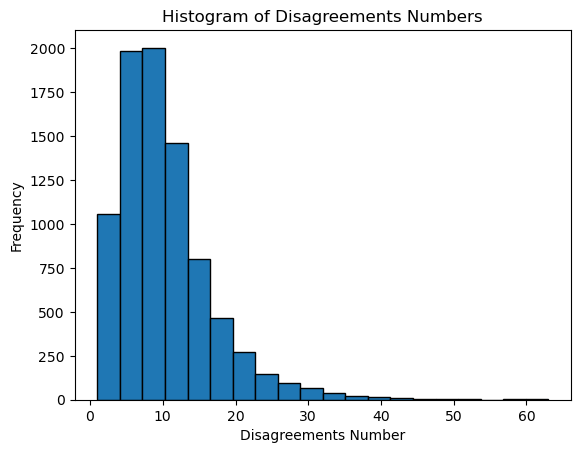

In [123]:
max_dis_per_game = disagreement_df.groupby('game')['dis_num'].max()
plt.hist(max_dis_per_game, bins=20, edgecolor='black')
plt.xlabel('Disagreements Number')
plt.ylabel('Frequency')
plt.title('Histogram of Disagreements Numbers')

In [124]:
disagreement_df['dis_in_game'] = disagreement_df['game'].map(max_dis_per_game)

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/4267267249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['dis_in_game'] = disagreement_df['game'].map(max_dis_per_game)


/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/37548317.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_range_9_14 = df_range_9_14[disagreement_df['dis_in_game'] > 8]


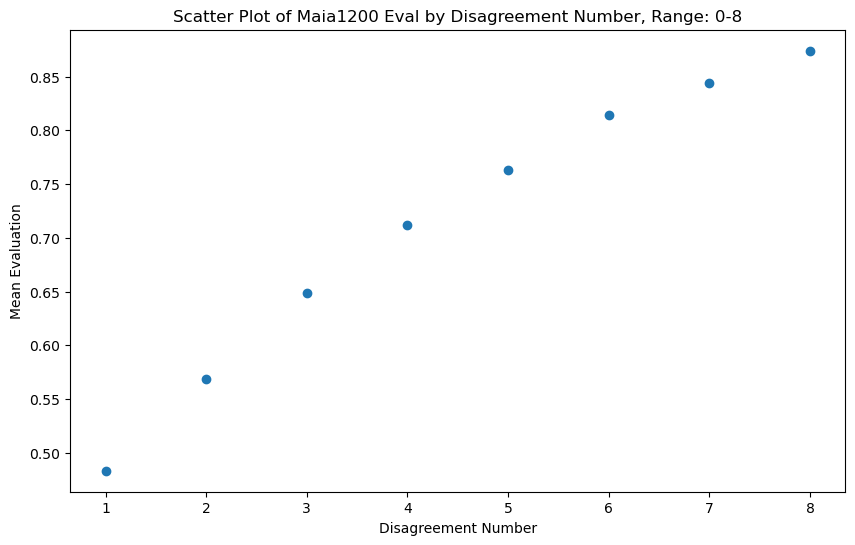

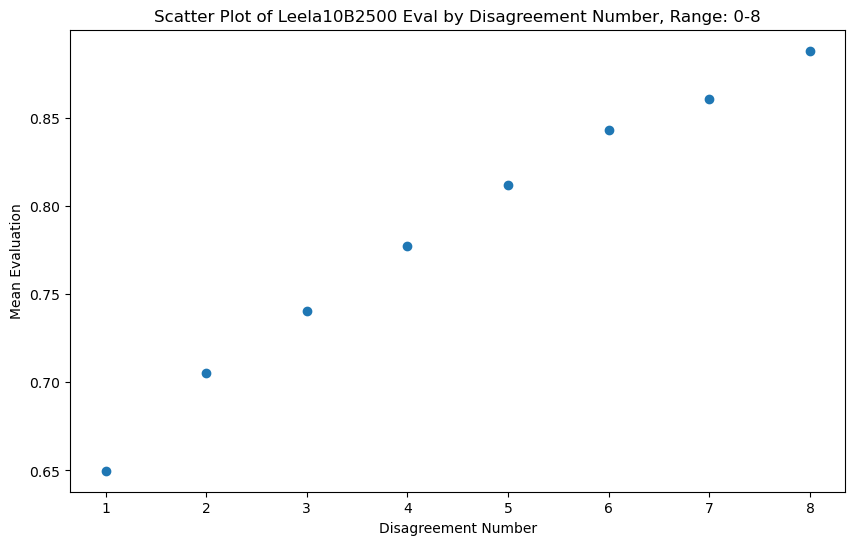

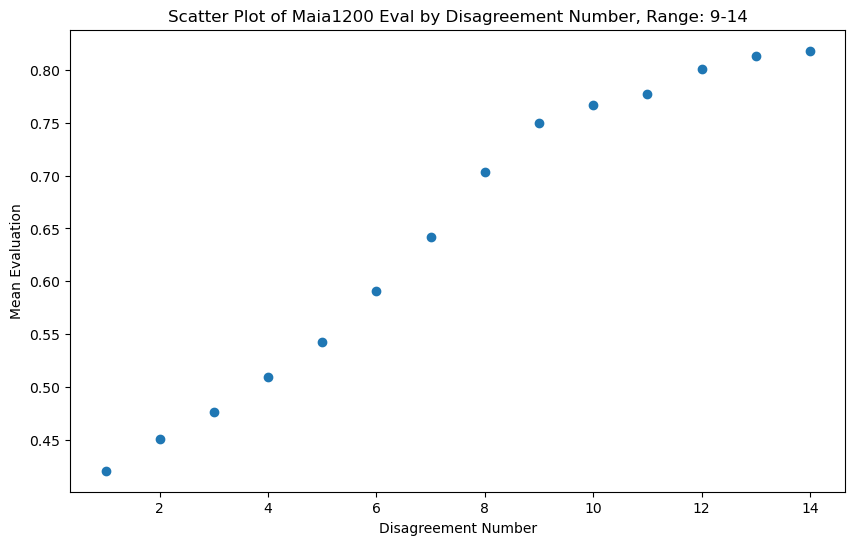

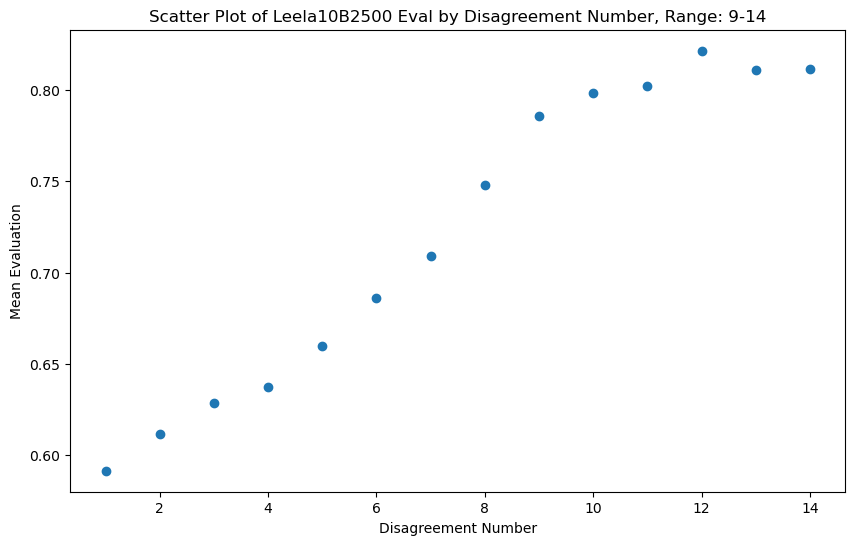

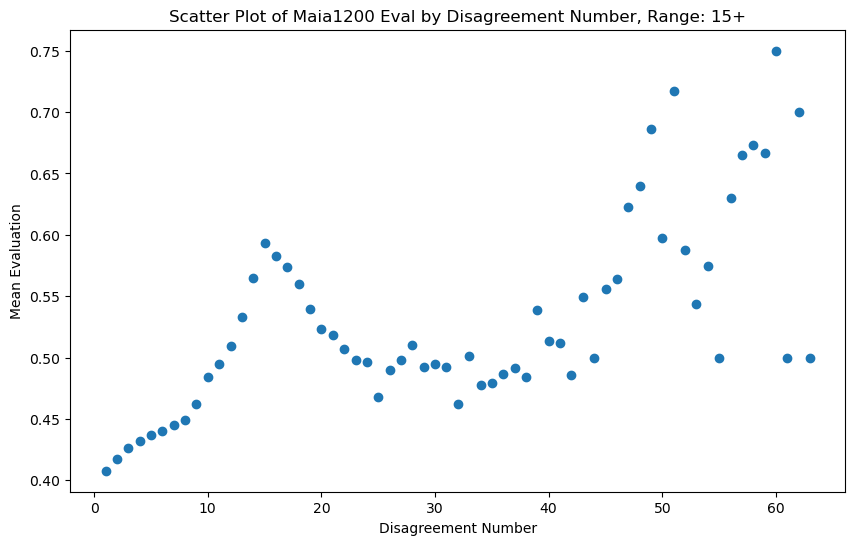

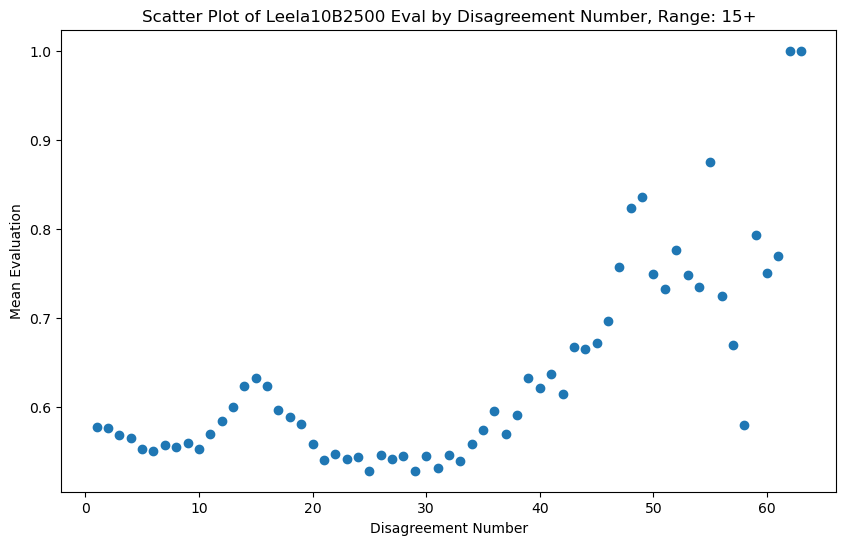

In [125]:
df_range_0_8 = disagreement_df[disagreement_df['dis_in_game'] <= 8]
df_range_9_14 = disagreement_df[disagreement_df['dis_in_game'] <= 14]
df_range_9_14 = df_range_9_14[disagreement_df['dis_in_game'] > 8]
df_range_15_plus = disagreement_df[disagreement_df['dis_in_game'] >= 15]
for df in [(df_range_0_8, "0-8"), (df_range_9_14, "9-14"), (df_range_15_plus, "15+")]:
    for eval_column in ['maia1200_eval', 'leela10b2500_eval']:
        mean_evaluation_by_move = df[0].groupby('dis_num')[eval_column].mean().reset_index()
        plt.figure(figsize=(10, 6))
        plt.scatter(mean_evaluation_by_move['dis_num'], mean_evaluation_by_move[eval_column])
        plt.title(f"Scatter Plot of {eval_column.replace('_', ' ').title()} by Disagreement Number, Range: {df[1]}")
        plt.xlabel('Disagreement Number')
        plt.ylabel('Mean Evaluation')

Text(0, 0.5, 'Mean Confidence')

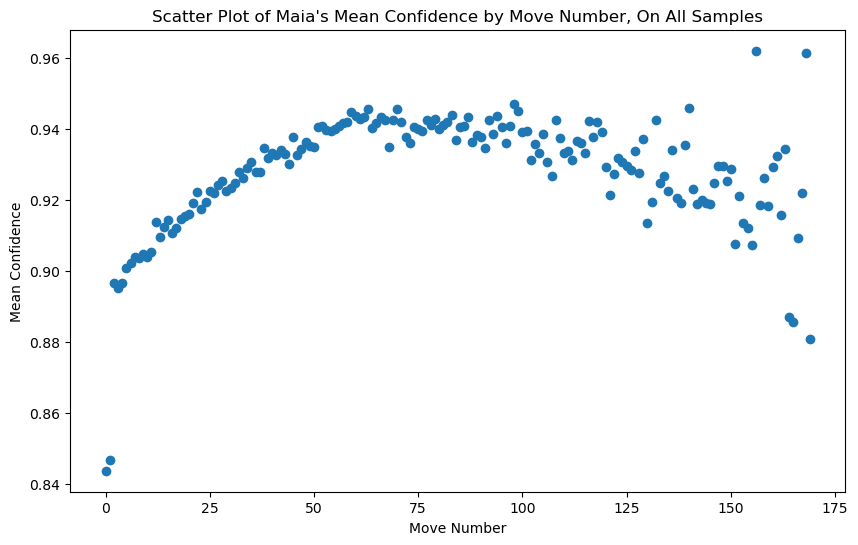

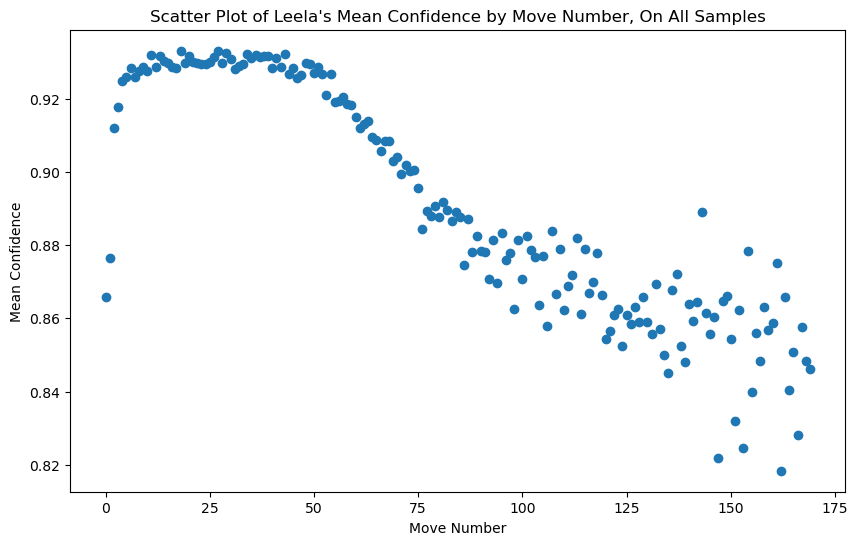

In [126]:
mean_evaluation_by_move = games_df.groupby('ply')['maia1200_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_conf'], label="Maia's Confidence")
plt.title("Scatter Plot of Maia's Mean Confidence by Move Number, On All Samples")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')
mean_evaluation_by_move = games_df.groupby('ply')['leela10b2500_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_conf'], label="Leela's Confidence")
plt.title("Scatter Plot of Leela's Mean Confidence by Move Number, On All Samples")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')

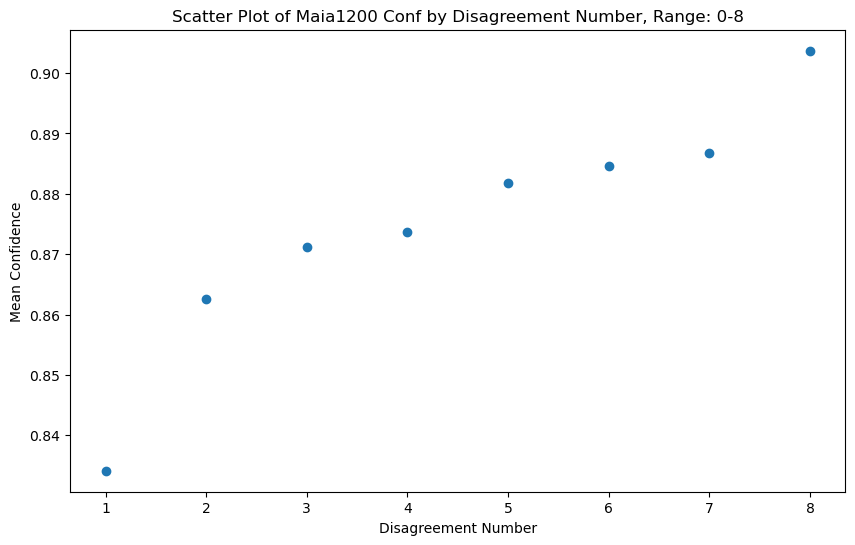

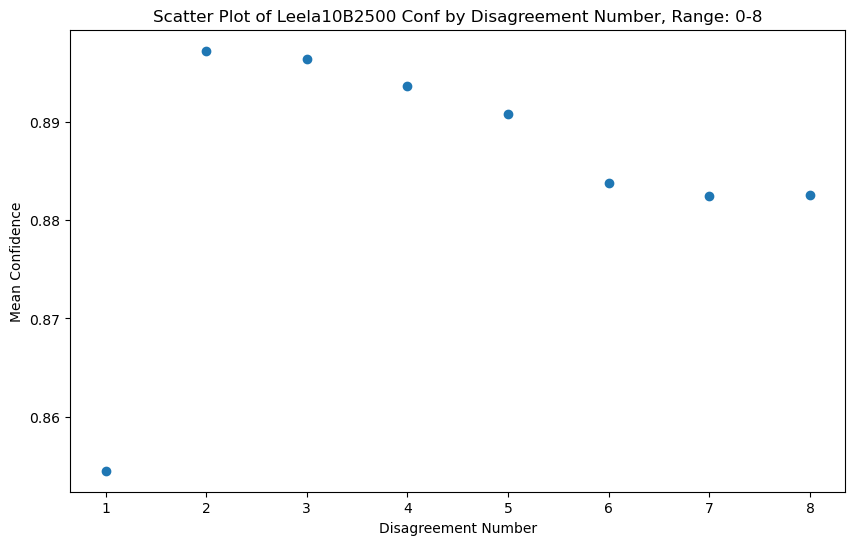

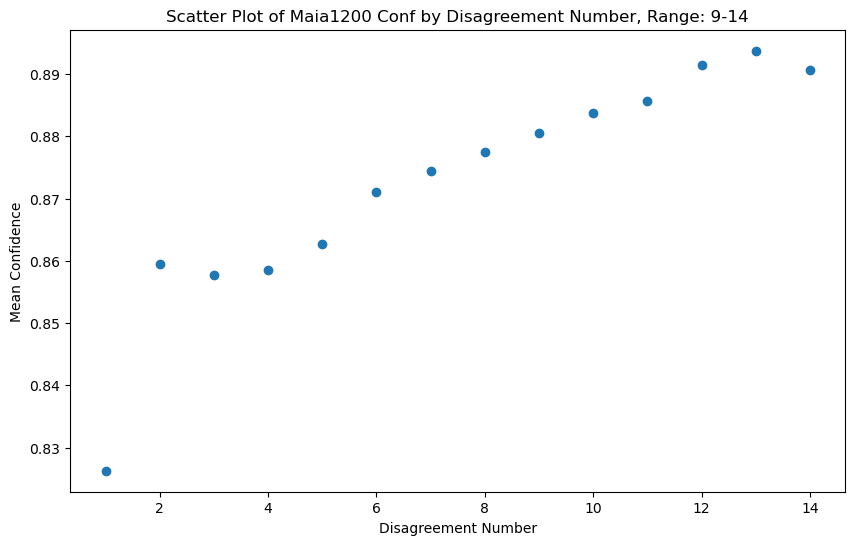

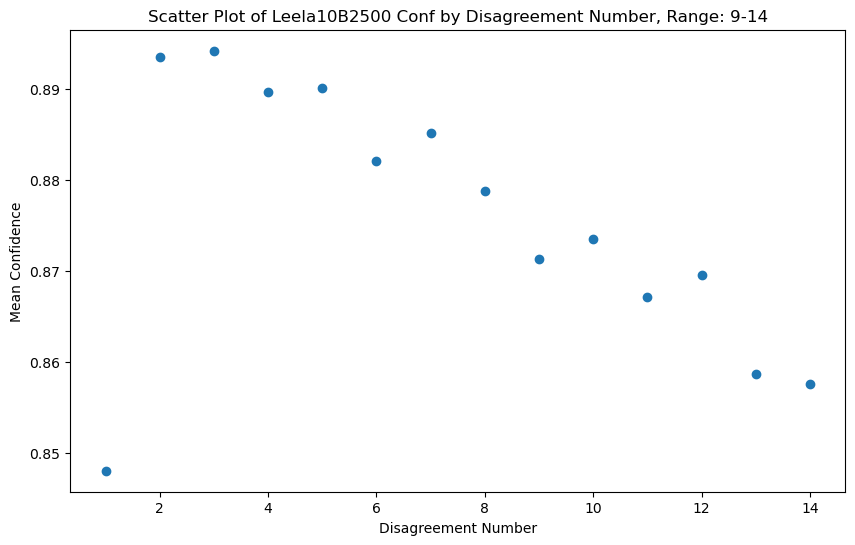

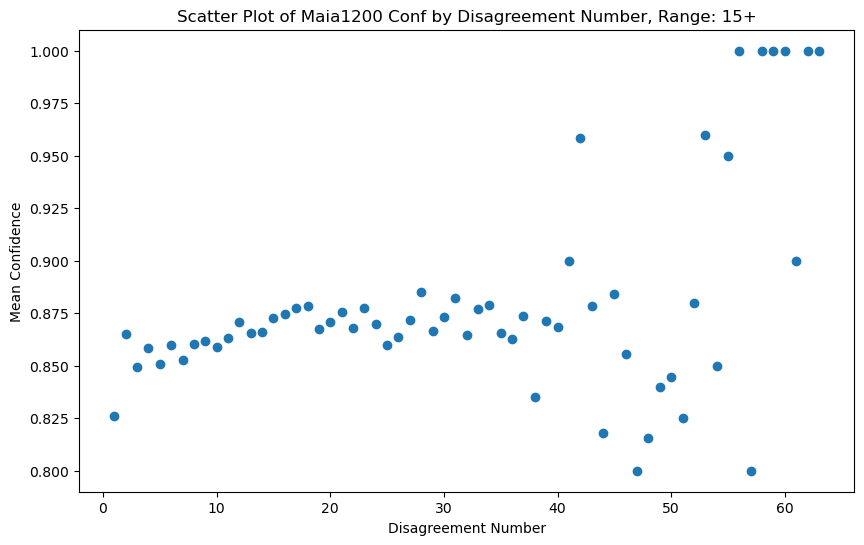

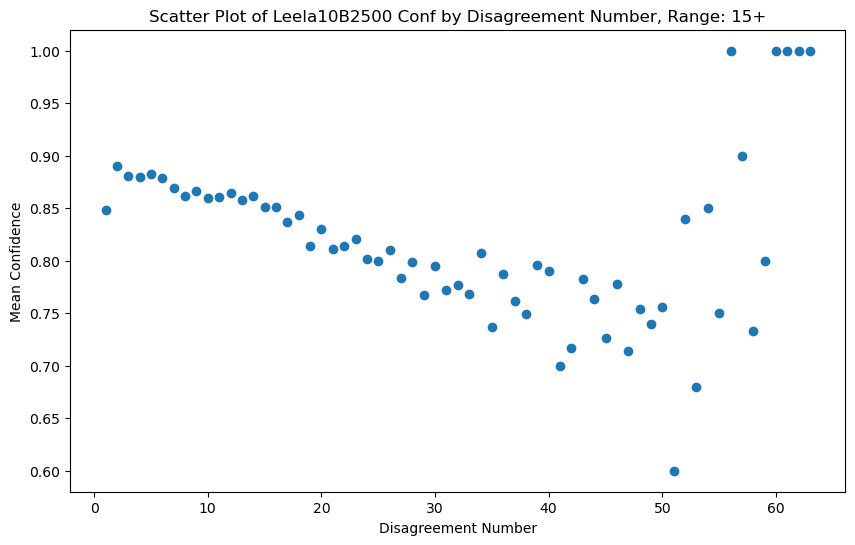

In [127]:
for df in [(df_range_0_8, "0-8"), (df_range_9_14, "9-14"), (df_range_15_plus, "15+")]:
    for eval_column in ['maia1200_conf', 'leela10b2500_conf']:
        mean_conf_by_move = df[0].groupby('dis_num')[eval_column].mean().reset_index()
        plt.figure(figsize=(10, 6))
        plt.scatter(mean_conf_by_move['dis_num'], mean_conf_by_move[eval_column], label="Maia's Confidence")
        plt.title(f"Scatter Plot of {eval_column.replace('_', ' ').title()} by Disagreement Number, Range: {df[1]}")
        plt.xlabel('Disagreement Number')
        plt.ylabel('Mean Confidence')

In [128]:
print("Mean values of board features when Maia is better:")
for i in range(len(mean_vec_maia)):
    print(f"Feature: {board_feature_names[i]}, mean: {mean_vec_maia[i].__round__(3)}, var: {var_vec_maia[i].__round__(3)}")

Mean values of board features when Maia is better:
Feature: color, mean: 0.501, var: 0.25
Feature: move_num, mean: 38.778, var: 963.46
Feature: legal_moves_player, mean: 32.453, var: 133.448
Feature: legal_moves_opponent, mean: 30.65, var: 136.137
Feature: legal_captures_player, mean: 2.062, var: 3.025
Feature: legal_captures_opponent, mean: 2.131, var: 2.713
Feature: in_check, mean: 0.043, var: 0.041
Feature: check_to_give_player, mean: 0.59, var: 0.242
Feature: check_to_give_opponent, mean: 0.506, var: 0.25
Feature: queen_threatened_player, mean: 0.059, var: 0.056
Feature: queen_threatened_opponent, mean: 0.02, var: 0.02
Feature: castling_rights_player, mean: 0.051, var: 0.049
Feature: castling_rights_opponent, mean: 0.077, var: 0.071
Feature: enough_material_to_win_player, mean: 0.008, var: 0.008
Feature: enough_material_to_win_opponent, mean: 0.014, var: 0.014
Feature: number_pieces_player, mean: 9.89, var: 11.131
Feature: number_pieces_opponent, mean: 9.383, var: 14.874
Feature: m

In [129]:
print("Mean values of board features when Leela is better:")
for i in range(len(mean_vec_leela)):
    print(f"Feature: {board_feature_names[i]}, mean: {mean_vec_leela[i].__round__(3)}, var: {var_vec_leela[i].__round__(3)}")

Mean values of board features when Leela is better:
Feature: color, mean: 0.517, var: 0.25
Feature: move_num, mean: 30.709, var: 953.796
Feature: legal_moves_player, mean: 33.61, var: 117.685
Feature: legal_moves_opponent, mean: 33.234, var: 100.54
Feature: legal_captures_player, mean: 2.259, var: 2.942
Feature: legal_captures_opponent, mean: 2.306, var: 2.59
Feature: in_check, mean: 0.037, var: 0.035
Feature: check_to_give_player, mean: 0.499, var: 0.25
Feature: check_to_give_opponent, mean: 0.472, var: 0.249
Feature: queen_threatened_player, mean: 0.06, var: 0.056
Feature: queen_threatened_opponent, mean: 0.024, var: 0.024
Feature: castling_rights_player, mean: 0.082, var: 0.075
Feature: castling_rights_opponent, mean: 0.108, var: 0.097
Feature: enough_material_to_win_player, mean: 0.004, var: 0.004
Feature: enough_material_to_win_opponent, mean: 0.003, var: 0.003
Feature: number_pieces_player, mean: 10.941, var: 11.8
Feature: number_pieces_opponent, mean: 10.699, var: 13.762
Feature

In [130]:
print("Mean values of board features when the contributor is random:")
for i in range(len(mean_vec_leela)):
    print(f"Feature: {board_feature_names[i]}, mean: {mean_vec_rand[i].__round__(3)}, var: {var_vec_rand[i].__round__(3)}")

Mean values of board features when the contributor is random:
Feature: color, mean: 0.491, var: 0.25
Feature: move_num, mean: 69.268, var: 996.012
Feature: legal_moves_player, mean: 30.665, var: 150.799
Feature: legal_moves_opponent, mean: 13.97, var: 127.902
Feature: legal_captures_player, mean: 1.02, var: 2.055
Feature: legal_captures_opponent, mean: 0.765, var: 1.368
Feature: in_check, mean: 0.039, var: 0.038
Feature: check_to_give_player, mean: 0.81, var: 0.154
Feature: check_to_give_opponent, mean: 0.275, var: 0.199
Feature: queen_threatened_player, mean: 0.026, var: 0.025
Feature: queen_threatened_opponent, mean: 0.008, var: 0.008
Feature: castling_rights_player, mean: 0.009, var: 0.008
Feature: castling_rights_opponent, mean: 0.009, var: 0.009
Feature: enough_material_to_win_player, mean: 0.014, var: 0.014
Feature: enough_material_to_win_opponent, mean: 0.177, var: 0.146
Feature: number_pieces_player, mean: 6.473, var: 7.405
Feature: number_pieces_opponent, mean: 4.528, var: 10.

Z-test results between Maia and Leela board features:

In [131]:
from scipy import stats
for i in range(len(mean_vec_maia)):
    var1 = var_vec_maia[i]
    var2 = var_vec_leela[i]
    pooled_se = np.sqrt(var1 + var2)
    z_score = (mean_vec_maia[i] - mean_vec_leela[i]) / pooled_se
    critical_value = stats.norm.ppf(1 - 0.05 / 2)
    if abs(z_score) > critical_value:
        print(f"Means of feature {board_feature_names[i]} are significantly different.")

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/899180387.py:6: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (mean_vec_maia[i] - mean_vec_leela[i]) / pooled_se


In [132]:
for i in range(len(z_vals)):
    print(f"Feature: {board_feature_names[i]}, z-stat: {z_vals[i].__round__(3)}")

Feature: color, z-stat: -4.594
Feature: move_num, z-stat: 37.389
Feature: legal_moves_player, z-stat: -14.936
Feature: legal_moves_opponent, z-stat: -34.771
Feature: legal_captures_player, z-stat: -16.392
Feature: legal_captures_opponent, z-stat: -15.491
Feature: in_check, z-stat: 4.403
Feature: check_to_give_player, z-stat: 26.237
Feature: check_to_give_opponent, z-stat: 9.738
Feature: queen_threatened_player, z-stat: -0.205
Feature: queen_threatened_opponent, z-stat: -4.006
Feature: castling_rights_player, z-stat: -16.925
Feature: castling_rights_opponent, z-stat: -14.924
Feature: enough_material_to_win_player, z-stat: 7.661
Feature: enough_material_to_win_opponent, z-stat: 18.893
Feature: number_pieces_player, z-stat: -44.32
Feature: number_pieces_opponent, z-stat: -50.119
Feature: materiel_points_player, z-stat: -38.665
Feature: material_points_opponent, z-stat: -48.532
Feature: knights_num_player, z-stat: -38.428
Feature: knights_num_opponent, z-stat: -40.351
Feature: bishops_num_

The only two features with p-val > 0.05 are: queen_threatened_player, king_freedom_to_move_player.

In [133]:
def calculate_mean_of_board_feats(df):
    vector_list = []
    for position in df['position']:
        board_feat_instance = board_features(position)
        extracted_vector = board_feat_instance.extract()
        vector_list.append(extracted_vector)

    vector_array = np.array(vector_list)
    mean_vector = np.mean(vector_array, axis=0)
    return mean_vector

In [134]:
games_df["maia_better"] = games_df['maia1200_eval'] > games_df['leela10b2500_eval']
games_df["leela_better"] = games_df['leela10b2500_eval'] > games_df['maia1200_eval']
maia_better_df = games_df[games_df['maia_better'] == True]
leela_better_df = games_df[games_df['leela_better'] == True]
maia_better_df['eval_diff'] = maia_better_df['maia1200_eval'] - maia_better_df['leela10b2500_eval']
leela_better_df['eval_diff'] = leela_better_df['leela10b2500_eval'] - leela_better_df['maia1200_eval']
top_maia_samples = maia_better_df.nlargest(1000, 'eval_diff')
top_leela_samples = leela_better_df.nlargest(1000, 'eval_diff')
top_mean_vec_maia = calculate_mean_of_board_feats(top_maia_samples)
print("Mean values of board features in the top 1000 moves in favor of Maia:")
for i in range(len(top_mean_vec_maia)):
    print(f"Feature: {board_feature_names[i]}, mean: {top_mean_vec_maia[i].__round__(3)}")

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/1757629161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maia_better_df['eval_diff'] = maia_better_df['maia1200_eval'] - maia_better_df['leela10b2500_eval']
/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/1757629161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leela_better_df['eval_diff'] = leela_better_df['leela10b2500_eval'] - leela_better_df['maia1200_eval']


Mean values of board features in the top 1000 moves in favor of Maia:
Feature: color, mean: 0.474
Feature: move_num, mean: 36.362
Feature: legal_moves_player, mean: 33.91
Feature: legal_moves_opponent, mean: 35.434
Feature: legal_captures_player, mean: 2.601
Feature: legal_captures_opponent, mean: 2.826
Feature: in_check, mean: 0.042
Feature: check_to_give_player, mean: 0.69
Feature: check_to_give_opponent, mean: 0.698
Feature: queen_threatened_player, mean: 0.103
Feature: queen_threatened_opponent, mean: 0.027
Feature: castling_rights_player, mean: 0.035
Feature: castling_rights_opponent, mean: 0.056
Feature: enough_material_to_win_player, mean: 0.0
Feature: enough_material_to_win_opponent, mean: 0.0
Feature: number_pieces_player, mean: 9.872
Feature: number_pieces_opponent, mean: 9.974
Feature: materiel_points_player, mean: 24.863
Feature: material_points_opponent, mean: 25.242
Feature: knights_num_player, mean: 0.687
Feature: knights_num_opponent, mean: 0.732
Feature: bishops_num_pl

In [135]:
print("Number of Maia better samples: " + str(maia_better_df.shape[0]))
print("Number of Leela better samples: " + str(leela_better_df.shape[0]))

Number of Maia better samples: 32346
Number of Leela better samples: 56418


In [136]:
top_mean_vec_leela = calculate_mean_of_board_feats(top_leela_samples)
print("Mean values of board features in the top 1000 moves in favor of Leela:")
for i in range(len(top_mean_vec_leela)):
    print(f"Feature: {board_feature_names[i]}, mean: {top_mean_vec_leela[i].__round__(3)}")

Mean values of board features in the top 1000 moves in favor of Leela:
Feature: color, mean: 0.486
Feature: move_num, mean: 30.862
Feature: legal_moves_player, mean: 35.279
Feature: legal_moves_opponent, mean: 36.048
Feature: legal_captures_player, mean: 2.792
Feature: legal_captures_opponent, mean: 2.884
Feature: in_check, mean: 0.053
Feature: check_to_give_player, mean: 0.564
Feature: check_to_give_opponent, mean: 0.637
Feature: queen_threatened_player, mean: 0.126
Feature: queen_threatened_opponent, mean: 0.053
Feature: castling_rights_player, mean: 0.061
Feature: castling_rights_opponent, mean: 0.072
Feature: enough_material_to_win_player, mean: 0.0
Feature: enough_material_to_win_opponent, mean: 0.0
Feature: number_pieces_player, mean: 10.772
Feature: number_pieces_opponent, mean: 10.788
Feature: materiel_points_player, mean: 27.203
Feature: material_points_opponent, mean: 27.409
Feature: knights_num_player, mean: 0.836
Feature: knights_num_opponent, mean: 0.889
Feature: bishops_n

Now, we'll check the move properties in disagreements, when Maia's move is better, and when Leela's move is better.

In [137]:
move_feats_diss_maia = []
for ind, row in disagreement_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_diss_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_diss_maia = np.array(move_feats_diss_maia)
mean_vector_diss_maia = np.mean(vector_array_diss_maia, axis=0)
variance_vector_diss_maia = np.var(vector_array_diss_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                 6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features in disagreements:")
for i, (mean, var) in enumerate(zip(mean_vector_diss_maia, variance_vector_diss_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")


Maia's move features in disagreements:
distance: Mean = 1.815, Variance = 1.322
king approach: Mean = -0.746, Variance = 1.737
advance/ retreat: Mean = 0.135, Variance = 0.117
flanking: Mean = 0.774, Variance = 0.175
pawn: Mean = 0.243, Variance = 0.184
rook: Mean = 0.193, Variance = 0.156
knight: Mean = 0.17, Variance = 0.141
bishop: Mean = 0.168, Variance = 0.14
queen: Mean = 0.131, Variance = 0.114
king: Mean = 0.095, Variance = 0.086
check: Mean = 0.102, Variance = 0.092
capture: Mean = 0.235, Variance = 0.18
castle: Mean = 0.012, Variance = 0.012


In [138]:
move_feats_diss_leela = []
for ind, row in disagreement_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_diss_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_diss_leela = np.array(move_feats_diss_leela)
mean_vector_diss_leela = np.mean(vector_array_diss_leela, axis=0)
variance_vector_diss_leela = np.var(vector_array_diss_leela, axis=0)
print("Leela's move features in disagreements:")
for i, (mean, var) in enumerate(zip(mean_vector_diss_leela, variance_vector_diss_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features in disagreements:
distance: Mean = 1.763, Variance = 1.098
king approach: Mean = -0.546, Variance = 1.729
advance/ retreat: Mean = 0.173, Variance = 0.143
flanking: Mean = 0.776, Variance = 0.174
pawn: Mean = 0.233, Variance = 0.179
rook: Mean = 0.21, Variance = 0.166
knight: Mean = 0.148, Variance = 0.126
bishop: Mean = 0.158, Variance = 0.133
queen: Mean = 0.147, Variance = 0.126
king: Mean = 0.103, Variance = 0.093
check: Mean = 0.041, Variance = 0.04
capture: Mean = 0.135, Variance = 0.117
castle: Mean = 0.007, Variance = 0.007


In [139]:
move_feats_maia = []
for ind, row in maia_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
print("Maia's move features when it's better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when it's better:
distance: Mean = 1.842, Variance = 1.38
king approach: Mean = -0.682, Variance = 1.843
advance/ retreat: Mean = 0.158, Variance = 0.133
flanking: Mean = 0.774, Variance = 0.175
pawn: Mean = 0.225, Variance = 0.174
rook: Mean = 0.212, Variance = 0.167
knight: Mean = 0.153, Variance = 0.13
bishop: Mean = 0.154, Variance = 0.13
queen: Mean = 0.152, Variance = 0.129
king: Mean = 0.105, Variance = 0.094
check: Mean = 0.122, Variance = 0.107
capture: Mean = 0.19, Variance = 0.154
castle: Mean = 0.009, Variance = 0.009


In [140]:
move_feats_leela = []
for ind, row in maia_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
print("Leela's move features when Maia's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when Maia's move is better:
distance: Mean = 1.764, Variance = 1.197
king approach: Mean = -0.522, Variance = 1.766
advance/ retreat: Mean = 0.173, Variance = 0.143
flanking: Mean = 0.784, Variance = 0.17
pawn: Mean = 0.225, Variance = 0.174
rook: Mean = 0.219, Variance = 0.171
knight: Mean = 0.136, Variance = 0.118
bishop: Mean = 0.151, Variance = 0.128
queen: Mean = 0.155, Variance = 0.131
king: Mean = 0.114, Variance = 0.101
check: Mean = 0.06, Variance = 0.056
capture: Mean = 0.167, Variance = 0.139
castle: Mean = 0.006, Variance = 0.006


In [141]:
move_feats_maia = []
for ind, row in leela_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features when Leela's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when Leela's move is better:
distance: Mean = 1.8, Variance = 1.288
king approach: Mean = -0.783, Variance = 1.672
advance/ retreat: Mean = 0.122, Variance = 0.107
flanking: Mean = 0.773, Variance = 0.175
pawn: Mean = 0.253, Variance = 0.189
rook: Mean = 0.183, Variance = 0.149
knight: Mean = 0.18, Variance = 0.147
bishop: Mean = 0.176, Variance = 0.145
queen: Mean = 0.119, Variance = 0.105
king: Mean = 0.089, Variance = 0.081
check: Mean = 0.091, Variance = 0.082
capture: Mean = 0.262, Variance = 0.193
castle: Mean = 0.014, Variance = 0.014


In [142]:
move_feats_leela = []
for ind, row in leela_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Leela's move features when its move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when its move is better:
distance: Mean = 1.763, Variance = 1.041
king approach: Mean = -0.56, Variance = 1.707
advance/ retreat: Mean = 0.172, Variance = 0.143
flanking: Mean = 0.772, Variance = 0.176
pawn: Mean = 0.238, Variance = 0.181
rook: Mean = 0.205, Variance = 0.163
knight: Mean = 0.155, Variance = 0.131
bishop: Mean = 0.161, Variance = 0.135
queen: Mean = 0.143, Variance = 0.123
king: Mean = 0.097, Variance = 0.088
check: Mean = 0.031, Variance = 0.03
capture: Mean = 0.116, Variance = 0.103
castle: Mean = 0.008, Variance = 0.008


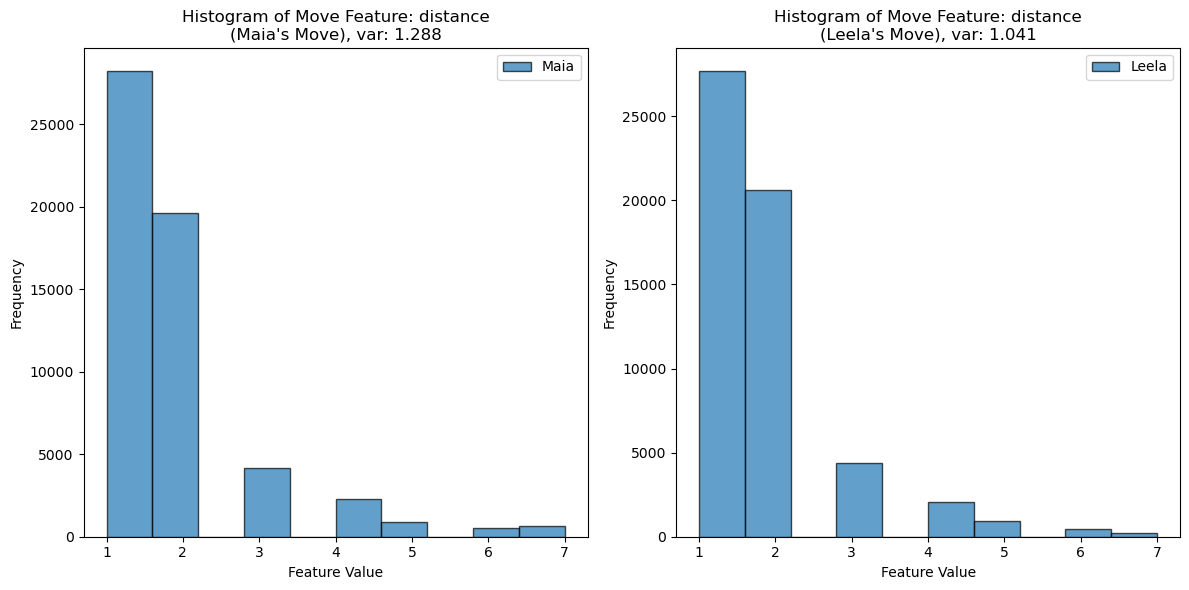

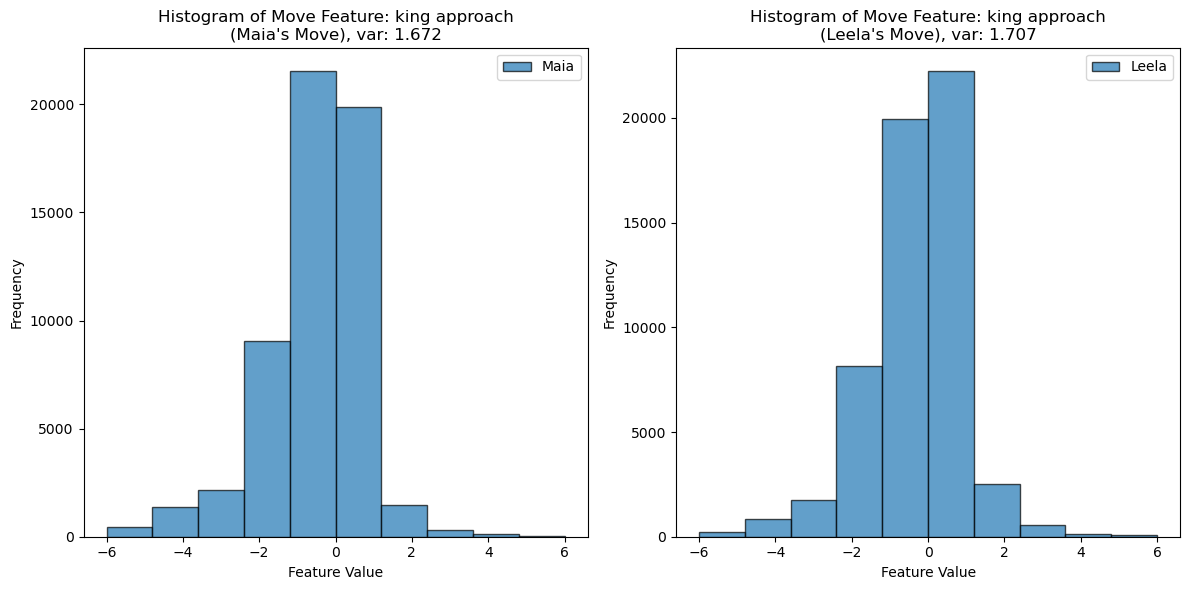

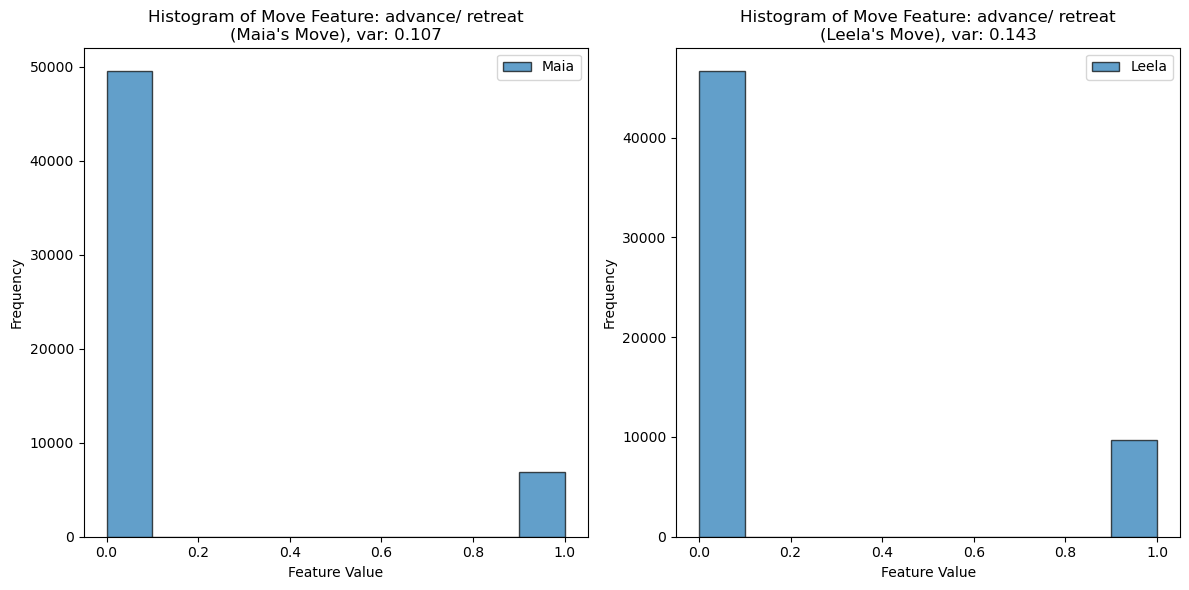

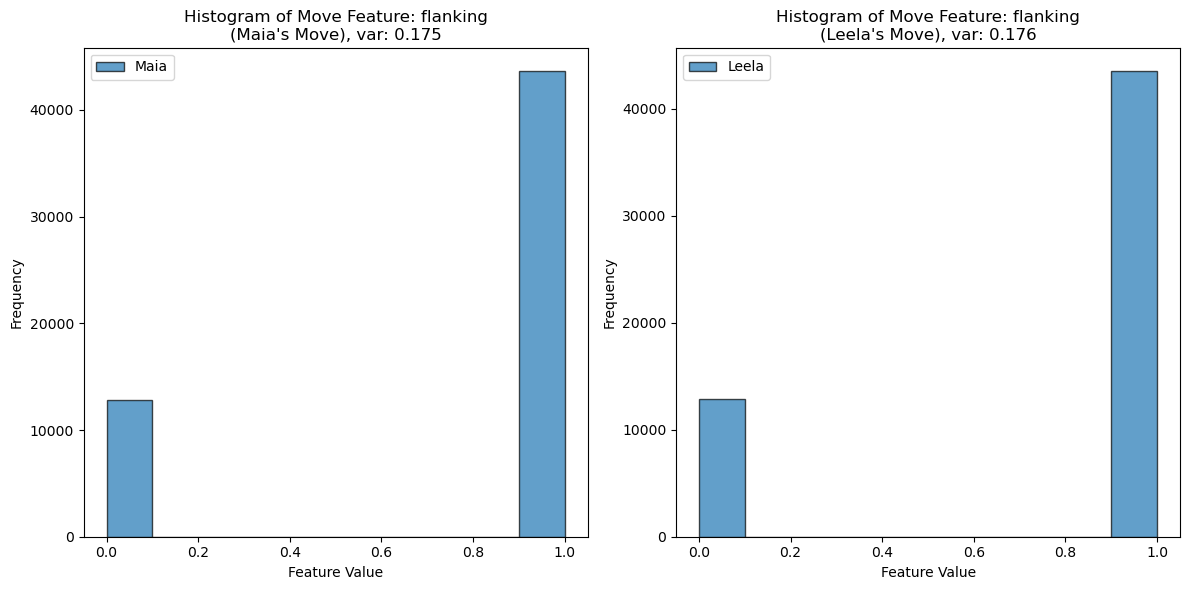

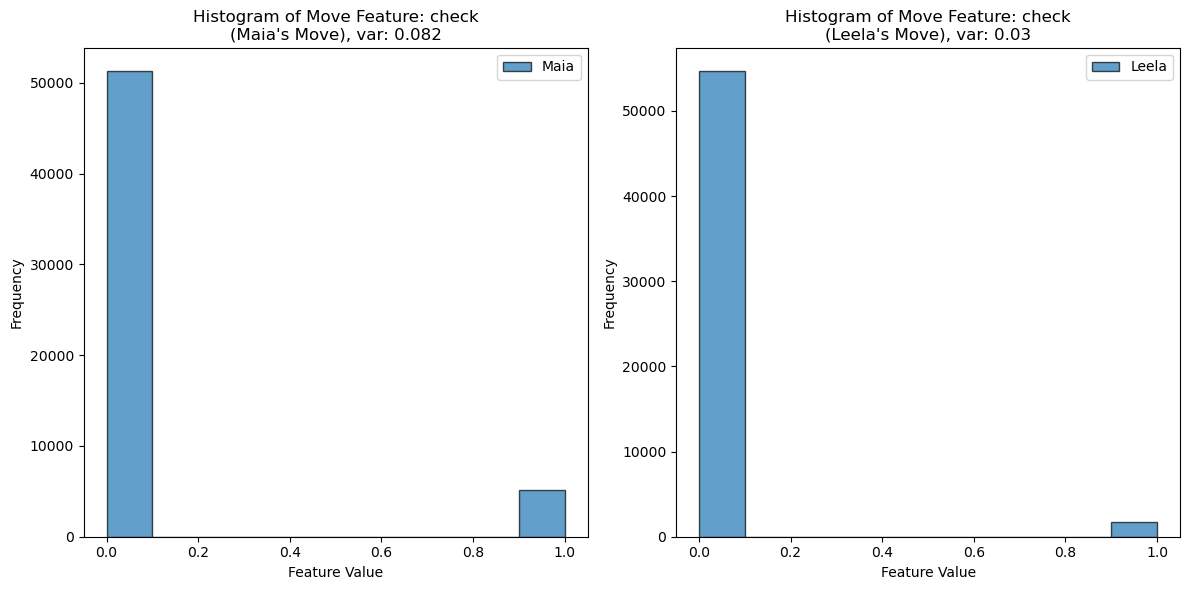

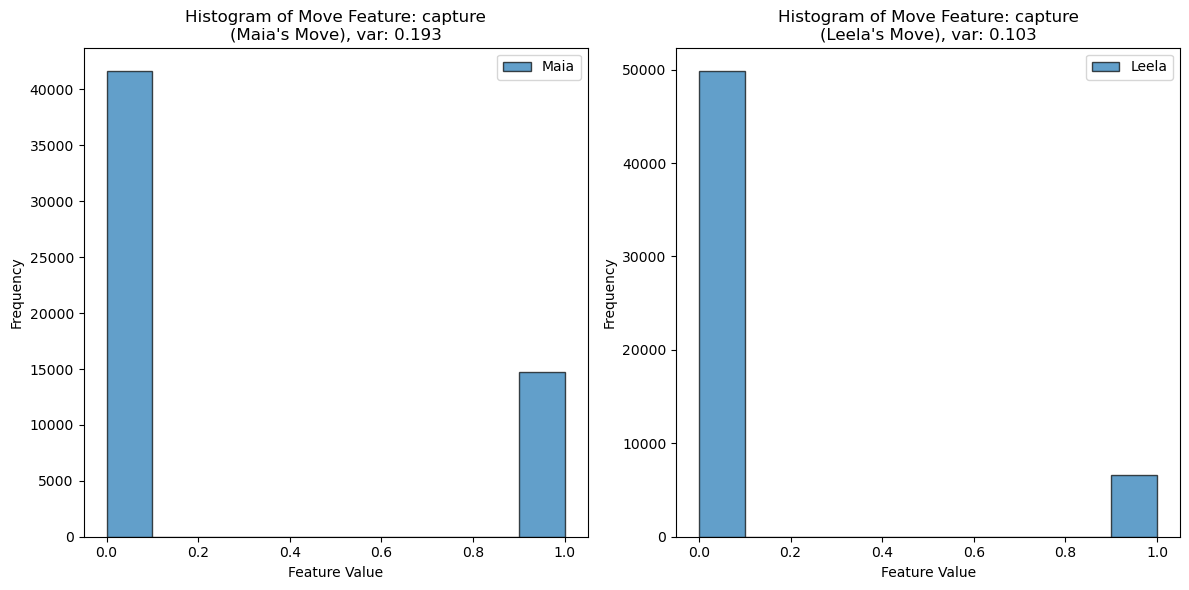

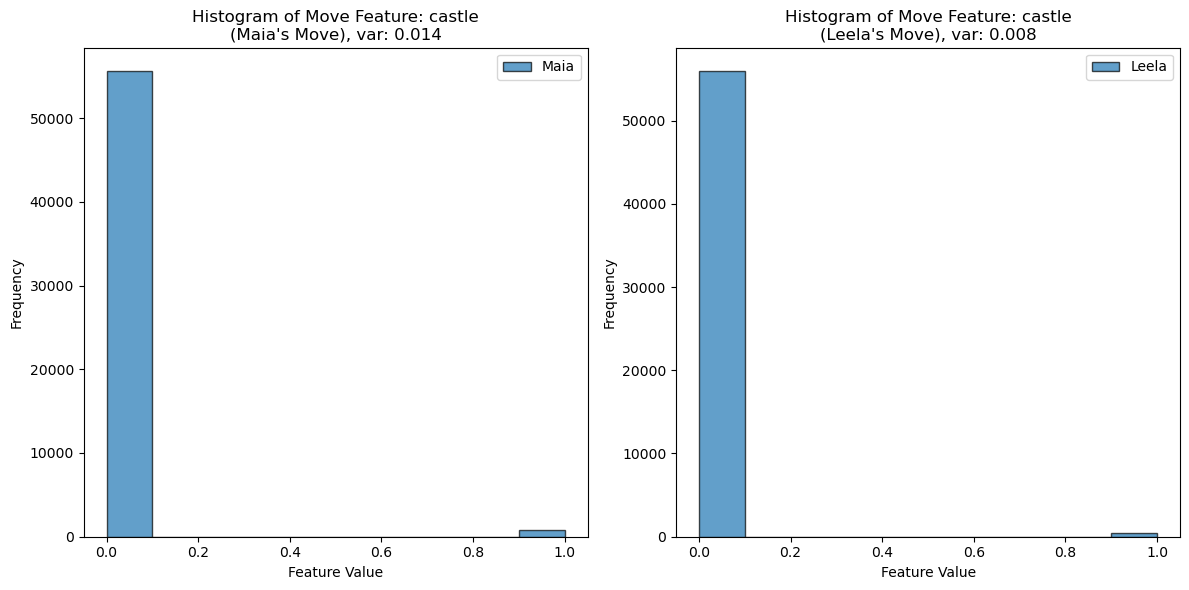

In [143]:
for i in range(vector_array_maia.shape[1]):
    if 4 <= i <= 9:
        continue
    plt.figure(figsize=(12, 6))

    # Create Maia's histogram
    plt.subplot(1, 2, 1)
    plt.hist(vector_array_maia[:, i], bins=10, edgecolor='black', alpha=0.7, label='Maia')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Maia's Move), var: {variance_vector_maia[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()

    # Create Leela's histogram
    plt.subplot(1, 2, 2)
    plt.hist(vector_array_leela[:, i], bins=10, edgecolor='black', alpha=0.7, label='Leela')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Leela's Move), var: {variance_vector_leela[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

Now, we'll look for the situations in which the difference between Maia's eval and Leela's eval was the largest in favor of Maia, and check if we can find a pattern.

Color: black, Maia's move: e6h6, Leela's move: e6e3, result: lose, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('d6f4', 'maia1200'), ('h6h2', 'maia1200'), ('f4e5', 'leela10b2500'), ('h2c2', 'leela10b2500'), ('e7f6', 'agreed'), ('f6e6', 'agreed'), ('e6f5', 'agreed'), ('f5g5', 'agreed'), ('e5c3', 'random'), ('c3f6', 'agreed'), ('c4c3', 'agreed'), ('f6g7', 'agreed'), ('g5h5', 'random')]


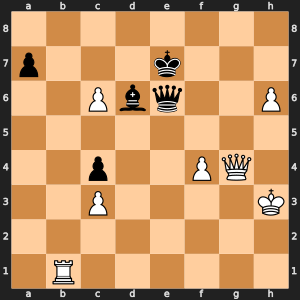

Color: black, Maia's move: f7f6, Leela's move: d6d5, result: lose, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('e7f6', 'agreed'), ('f6g7', 'leela10b2500'), ('d8f6', 'random'), ('g6f5', 'agreed'), ('a8b8', 'random'), ('f8f7', 'agreed'), ('f6f7', 'agreed'), ('g7e5', 'maia1200'), ('g8f8', 'maia1200'), ('b5b4', 'leela10b2500'), ('b4b3', 'agreed'), ('b3c2', 'agreed'), ('f7b3', 'maia1200'), ('f8e7', 'agreed'), ('e5f6', 'agreed'), ('e7e6', 'maia1200'), ('e6e5', 'maia1200'), ('b3a4', 'agreed'), ('e5f4', 'agreed')]


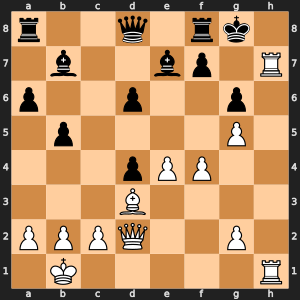

Color: black, Maia's move: f7f6, Leela's move: e8e2, result: win, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('e8e2', 'leela10b2500'), ('b5c3', 'agreed'), ('d4d3', 'random'), ('e2f1', 'random'), ('d3d2', 'agreed'), ('d2d1q', 'agreed'), ('d7c6', 'agreed'), ('d1f3', 'agreed'), ('f3g2', 'random'), ('g2h2', 'agreed')]


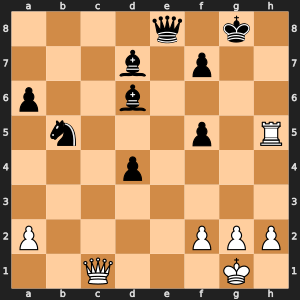

Color: white, Maia's move: c8g4, Leela's move: c8f8, result: win, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('g4g7', 'agreed'), ('g7e5', 'agreed'), ('e5d5', 'maia1200'), ('d5b7', 'agreed'), ('b7a6', 'maia1200'), ('b6b7', 'agreed'), ('a6a7', 'random'), ('b7b8r', 'random'), ('a7f7', 'agreed'), ('h4g5', 'random'), ('g5h4', 'agreed'), ('f7e7', 'random'), ('b8f8', 'agreed')]


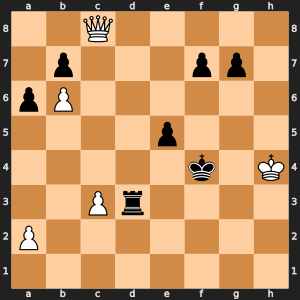

Color: black, Maia's move: d7e5, Leela's move: f5e7, result: win, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('d8d5', 'agreed'), ('e8e5', 'agreed'), ('g6f5', 'agreed'), ('d5e4', 'agreed'), ('e4d3', 'agreed'), ('d3g3', 'agreed'), ('a8e8', 'agreed'), ('g3h3', 'agreed'), ('e5e3', 'maia1200'), ('e3e1', 'maia1200'), ('e8e1', 'agreed'), ('h3f1', 'random'), ('e1e3', 'maia1200'), ('e3f3', 'random')]


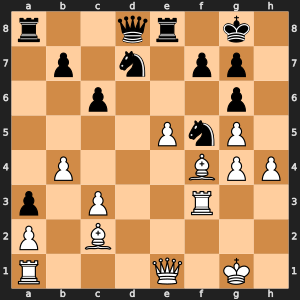

In [144]:
games_df['eval_diff'] = games_df['maia1200_eval'] - games_df['leela10b2500_eval']
top_samples = games_df.nlargest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    board = chess.Board(row['position'])
    game_df = games_df[games_df['game'] == row['game']]
    game_df = game_df[game_df['ply'] > row['ply']]
    moves_to_end = []
    for ind, row_ in game_df.iterrows():
        moves_to_end.append((row_['move'], row_['contributor']))
    print(f"Color: {row['color']}, Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}, Maia's eval: {row['maia1200_eval']}, Leela's eval: {row['leela10b2500_eval']}, Moves to end: {moves_to_end}")
    display(SVG(chess.svg.board(board, size=300)))

We can see that for all these top moves, Maia's eval is 1, while Leela's eval is 0. That's surprising, so it'd be good to check how many times this happens.

In [145]:
maia_1_leela_0 = games_df[games_df['maia1200_eval'] == 1]
maia_1_leela_0 = maia_1_leela_0[maia_1_leela_0['leela10b2500_eval'] == 0]
print(f"Number of situations where Maia has 1 eval and Leela 0: {len(maia_1_leela_0)}")

Number of situations where Maia has 1 eval and Leela 0: 68


The situations in which Leela's eval was much better:

Color: black, Maia's move: g8f8, Leela's move: d7e7, result: win, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('d8d2', 'agreed'), ('d2b2', 'agreed'), ('h7h6', 'agreed'), ('h6g5', 'agreed'), ('c4c3', 'agreed'), ('c3c2', 'agreed'), ('b5b4', 'agreed'), ('g8h7', 'agreed'), ('b4b3', 'agreed'), ('b2b1', 'agreed'), ('c2c1q', 'agreed'), ('b1c1', 'agreed'), ('b3b2', 'agreed'), ('b2b1q', 'agreed'), ('b1a1', 'random'), ('g7f8', 'random'), ('a1a5', 'random'), ('c1h1', 'random'), ('a5e1', 'random'), ('h1f1', 'random'), ('a6a5', 'random'), ('a5a4', 'agreed'), ('a4a3', 'agreed'), ('a3a2', 'agreed'), ('h7g6', 'agreed'), ('e1f2', 'random'), ('f1h1', 'agreed')]


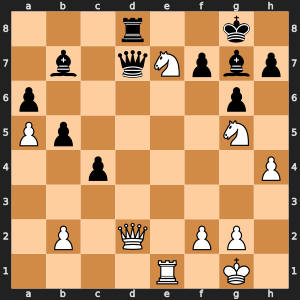

Color: black, Maia's move: c6e4, Leela's move: f6f3, result: win, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('d4e2', 'agreed'), ('f3h1', 'agreed'), ('h1e4', 'leela10b2500'), ('e4d4', 'agreed'), ('d4f4', 'maia1200'), ('c6e4', 'random'), ('e4d5', 'maia1200'), ('f4e4', 'agreed'), ('e4e1', 'agreed'), ('e1f2', 'agreed'), ('d5b3', 'agreed'), ('f2c2', 'agreed')]


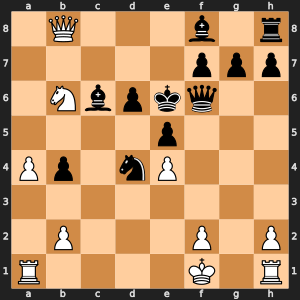

Color: black, Maia's move: d7e7, Leela's move: d7c8, result: win, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('f8f1', 'agreed'), ('e6g4', 'agreed'), ('f1d1', 'agreed'), ('e2e1q', 'agreed'), ('d1e1', 'agreed'), ('e1e2', 'agreed'), ('e2c2', 'agreed'), ('c8d7', 'agreed'), ('d7e8', 'agreed'), ('c2c5', 'agreed'), ('e8f7', 'agreed'), ('f7g7', 'agreed'), ('c5c4', 'agreed'), ('c6c5', 'agreed'), ('g7g6', 'agreed'), ('g6h7', 'agreed'), ('h7g6', 'agreed'), ('g6g5', 'agreed'), ('g5f4', 'random'), ('c4d4', 'random'), ('f4f3', 'agreed'), ('d4h4', 'random'), ('h4h1', 'agreed')]


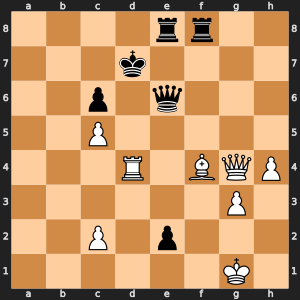

Color: white, Maia's move: g4d7, Leela's move: d2d7, result: win, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('h2h3', 'agreed'), ('d7e6', 'agreed'), ('e6b3', 'random'), ('f2e3', 'agreed'), ('f1f6', 'agreed'), ('g1h2', 'agreed'), ('g4f5', 'agreed'), ('f5g6', 'agreed'), ('a1g1', 'random'), ('b3e6', 'agreed'), ('c2c4', 'random'), ('c4c5', 'agreed'), ('b4a5', 'agreed'), ('a5a6', 'random'), ('c5c6', 'random'), ('a6a7', 'random'), ('c6c7', 'agreed'), ('c7c8q', 'random'), ('e6e7', 'random'), ('e7f6', 'agreed'), ('g1g6', 'agreed'), ('f6g7', 'random')]


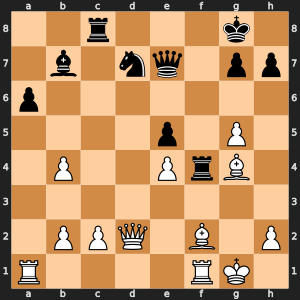

Color: white, Maia's move: d3c3, Leela's move: h1c1, result: win, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('d3c3', 'random'), ('c1c3', 'agreed'), ('e2d3', 'agreed'), ('d3c3', 'agreed'), ('c3e3', 'agreed'), ('e3h3', 'random'), ('h3g4', 'agreed'), ('g4e4', 'random'), ('e4h7', 'agreed'), ('h7f7', 'agreed'), ('d4d5', 'agreed'), ('f7e6', 'agreed'), ('e6c6', 'agreed'), ('d5d6', 'agreed'), ('c6c5', 'random'), ('d6d7', 'agreed'), ('d7d8q', 'random'), ('c5b5', 'random'), ('b5b6', 'agreed')]


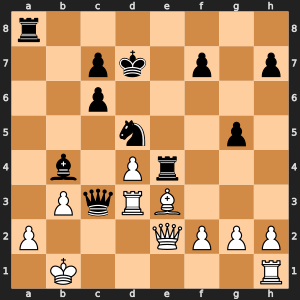

In [146]:
games_df["eval_diff"] = games_df["maia1200_eval"] - games_df["leela10b2500_eval"]
top_samples = games_df.nsmallest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    game_df = games_df[games_df['game'] == row['game']]
    game_df = game_df[game_df['ply'] > row['ply']]
    moves_to_end = []
    for ind, row_ in game_df.iterrows():
        moves_to_end.append((row_['move'], row_['contributor']))
    board = chess.Board(row['position'])
    print(f"Color: {row['color']}, Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}, Maia's eval: {row['maia1200_eval']}, Leela's eval: {row['leela10b2500_eval']}, Moves to end: {moves_to_end}")
    display(SVG(chess.svg.board(board, size=300)))

In [147]:
maia_0_leela_1 = games_df[games_df['maia1200_eval'] == 0]
maia_0_leela_1 = maia_0_leela_1[maia_0_leela_1['leela10b2500_eval'] == 1]
print(f"Number of situations where Maia has 0 eval and Leela 1: {len(maia_0_leela_1)}")

Number of situations where Maia has 0 eval and Leela 1: 46


In [148]:
maia_counts = disagreement_df.groupby('game')['contributor'].value_counts().unstack().fillna(0)['maia1200']
game_counts = disagreement_df['game'].value_counts().sort_index()
cur_game, cur_count, cur_total = -1, -1, -1
disagreement_df['maia_percent'] = 0
for index, row in disagreement_df.iterrows():
    if cur_game != row['game']:
        cur_game = row['game']
        cur_total = game_counts[cur_game]
        cur_count = maia_counts[cur_game]
    if row['contributor'] == 'maia1200':
        cur_count -= 1
        cur_total -= 1
    else:
        cur_total -= 1
    if cur_total == 0:
        disagreement_df.loc[index, 'maia_percent'] = 100
        continue
    disagreement_df.loc[index, 'maia_percent'] = (cur_count / cur_total) * 100

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/677063981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['maia_percent'] = 0


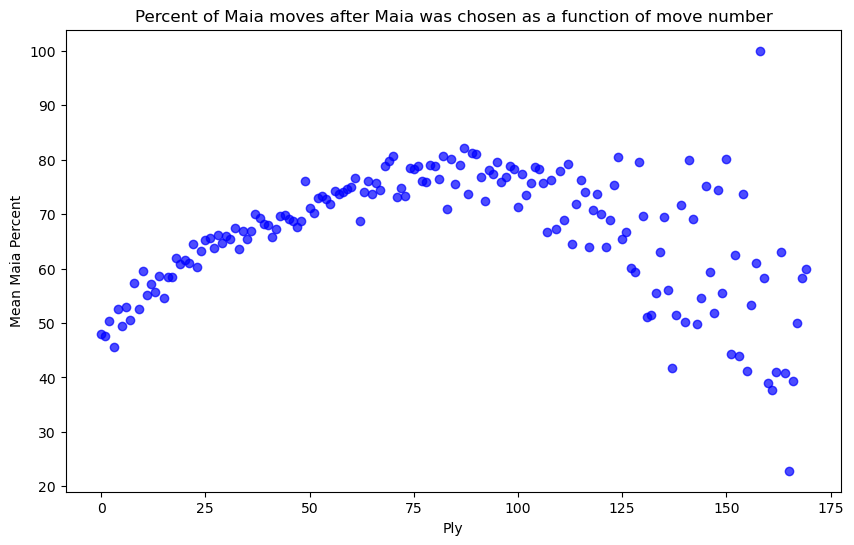

In [149]:
maia_per_df = disagreement_df[disagreement_df['contributor'] == 'maia1200']
maia_per_df = maia_per_df[maia_per_df['ply'] < 170]
plt.figure(figsize=(10, 6))  # Set the figure size
mean_percent_by_move = maia_per_df.groupby('ply')['maia_percent'].mean()

plt.scatter(mean_percent_by_move.index, mean_percent_by_move.values, color='blue', marker='o', alpha=0.7)
plt.title('Percent of Maia moves after Maia was chosen as a function of move number')
plt.xlabel('Ply')
plt.ylabel('Mean Maia Percent')
plt.show()

In [150]:
leela_counts = disagreement_df.groupby('game')['contributor'].value_counts().unstack().fillna(0)['leela10b2500']
cur_game, cur_count, cur_total = -1, -1, -1
disagreement_df['leela_percent'] = 0
for index, row in disagreement_df.iterrows():
    if cur_game != row['game']:
        cur_game = row['game']
        cur_total = game_counts[cur_game]
        cur_count = leela_counts[cur_game]
    if row['contributor'] == 'leela10b2500':
        cur_count -= 1
        cur_total -= 1
    else:
        cur_total -= 1
    if cur_total == 0:
        disagreement_df.loc[index, 'leela_percent'] = 100
        continue
    disagreement_df.loc[index, 'leela_percent'] = (cur_count / cur_total) * 100

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/201211316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['leela_percent'] = 0


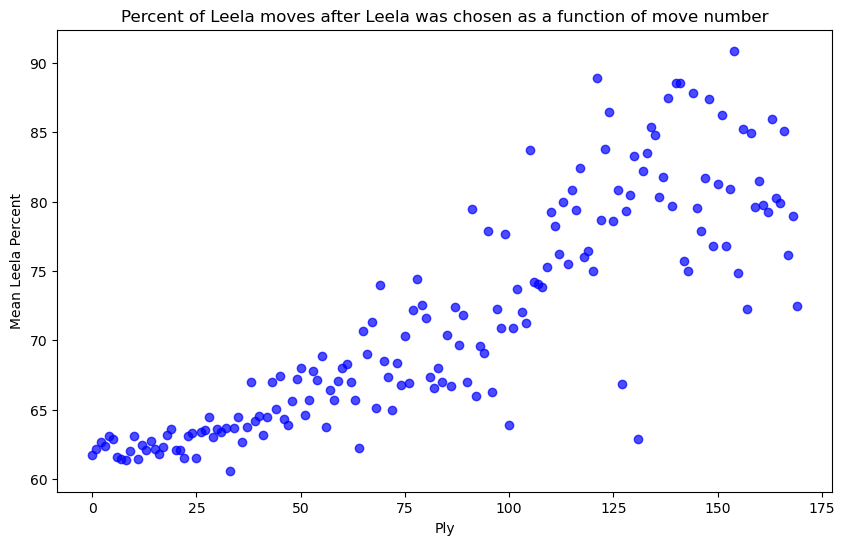

In [151]:
leela_per_df = disagreement_df[disagreement_df['contributor'] == 'leela10b2500']
leela_per_df = leela_per_df[leela_per_df['ply'] < 170]
plt.figure(figsize=(10, 6))  # Set the figure size
leela_percent_by_move = leela_per_df.groupby('ply')['leela_percent'].mean()

plt.scatter(leela_percent_by_move.index, leela_percent_by_move.values, color='blue', marker='o', alpha=0.7)
plt.title('Percent of Leela moves after Leela was chosen as a function of move number')
plt.xlabel('Ply')
plt.ylabel('Mean Leela Percent')
plt.show()

Now we'll check if choosing Maia at a certain point affects the odds of it being chosen on the next turn.

In [152]:
def calculate_percent_after_chosen(total, bot_name):
    ctr = 0
    cur_game = -1
    cur_bot = False
    for index, row in disagreement_df.iterrows():
        cur_ply = row['ply']
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bot = False
            continue
        if row['contributor'] == bot_name:
            if cur_bot:
                ctr += 1
            cur_bot = True
        else:
            cur_bot = False
    return (ctr / total) * 100

In [153]:
percent_maia = calculate_percent_after_chosen(len(maia_better_df), 'maia1200')
percent_leela = calculate_percent_after_chosen(len(leela_better_df), 'leela10b2500')
print(f"Percentage of times Maia is chosen in disagreements: {(len(maia_df) / len(disagreement_df) * 100).__round__(3)}%")
print(f"Percentage of times Maia is chosen after it was chosen the previous move: {percent_maia.__round__(3)}%")
print(f"Percentage of times Leela is chosen in disagreements: {(len(leela_df) / len(disagreement_df) * 100).__round__(3)}%")
print(f"Percentage of times Leela is chosen after it was chosen the previous move: {percent_leela.__round__(3)}%")

Percentage of times Maia is chosen in disagreements: 36.44%
Percentage of times Maia is chosen after it was chosen the previous move: 50.587%
Percentage of times Leela is chosen in disagreements: 63.56%
Percentage of times Leela is chosen after it was chosen the previous move: 60.789%


In [154]:
def calculate_percent_of_combination(total, bot_name1, bot_name2):
    ctr = 0
    cur_game = -1
    cur_bot = None
    for index, row in disagreement_df.iterrows():
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bot = row['contributor']
            continue
        if cur_bot == bot_name1 and row['contributor'] == bot_name2:
            ctr += 1
        cur_bot = row['contributor']
    return (ctr / total) * 100

In [155]:
print(f"Percentage of the bigram 'Maia-Maia': {calculate_percent_of_combination(len(disagreement_df), 'maia1200', 'maia1200').__round__(3)}%")
print(f"Percentage of the bigram 'Maia-Leela': {calculate_percent_of_combination(len(disagreement_df), 'maia1200', 'leela10b2500').__round__(3)}%")
print(f"Percentage of the bigram 'Leela-Maia': {calculate_percent_of_combination(len(disagreement_df), 'leela10b2500', 'maia1200').__round__(3)}%")
print(f"Percentage of the bigram 'Leela-Leela': {calculate_percent_of_combination(len(disagreement_df), 'leela10b2500', 'leela10b2500').__round__(3)}%")

Percentage of the bigram 'Maia-Maia': 19.384%
Percentage of the bigram 'Maia-Leela': 11.706%
Percentage of the bigram 'Leela-Maia': 14.933%
Percentage of the bigram 'Leela-Leela': 44.443%


In [156]:
def calculate_percent_of_combination_3(total, bot_name1, bot_name2, bot_name3):
    ctr = 0
    cur_game = -1
    cur_bots = [None, None, None]

    for index, row in disagreement_df.iterrows():
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bots = [None, None, None]
            continue

        cur_bots.pop(0)
        cur_bots.append(row['contributor'])

        if cur_bots[0] == bot_name1 and cur_bots[1] == bot_name2 and cur_bots[2] == bot_name3:
            ctr += 1

    return (ctr / total) * 100

In [157]:
from itertools import product

names = ['maia1200', 'leela10b2500']

permutations_of_3 = list(product(names, repeat=3))
for perm in permutations_of_3:
    print(f"Percentage of the trigram {perm[0]}, {perm[1]}, {perm[2]}: {calculate_percent_of_combination_3(len(disagreement_df), perm[0], perm[1], perm[2]).__round__(3)}%")

Percentage of the trigram maia1200, maia1200, maia1200: 10.202%
Percentage of the trigram maia1200, maia1200, leela10b2500: 4.661%
Percentage of the trigram maia1200, leela10b2500, maia1200: 2.864%
Percentage of the trigram maia1200, leela10b2500, leela10b2500: 6.731%
Percentage of the trigram leela10b2500, maia1200, maia1200: 6.927%
Percentage of the trigram leela10b2500, maia1200, leela10b2500: 4.791%
Percentage of the trigram leela10b2500, leela10b2500, maia1200: 8.93%
Percentage of the trigram leela10b2500, leela10b2500, leela10b2500: 26.638%


In [158]:
def calculate_percent_of_combination_4(total, bot_name1, bot_name2, bot_name3, bot_name4):
    ctr = 0
    cur_game = -1
    cur_bots = [None, None, None, None]

    for index, row in disagreement_df.iterrows():
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bots = [None, None, None, None]
            continue

        cur_bots.pop(0)
        cur_bots.append(row['contributor'])

        if cur_bots[0] == bot_name1 and cur_bots[1] == bot_name2 and cur_bots[2] == bot_name3 and cur_bots[3] == bot_name4:
            ctr += 1

    return (ctr / total) * 100

In [159]:
from itertools import product

names = ['maia1200', 'leela10b2500']

permutations_of_4 = list(product(names, repeat=4))
for perm in permutations_of_4:
    print(f"Percentage of the quadgram {perm[0]}, {perm[1]}, {perm[2]}, {perm[3]}: {calculate_percent_of_combination_4(len(disagreement_df), perm[0], perm[1], perm[2], perm[3]).__round__(3)}%")

Percentage of the quadgram maia1200, maia1200, maia1200, maia1200: 5.539%
Percentage of the quadgram maia1200, maia1200, maia1200, leela10b2500: 2.241%
Percentage of the quadgram maia1200, maia1200, leela10b2500, maia1200: 1.285%
Percentage of the quadgram maia1200, maia1200, leela10b2500, leela10b2500: 2.809%
Percentage of the quadgram maia1200, leela10b2500, maia1200, maia1200: 1.45%
Percentage of the quadgram maia1200, leela10b2500, maia1200, leela10b2500: 0.987%
Percentage of the quadgram maia1200, leela10b2500, leela10b2500, maia1200: 1.763%
Percentage of the quadgram maia1200, leela10b2500, leela10b2500, leela10b2500: 4.391%
Percentage of the quadgram leela10b2500, maia1200, maia1200, maia1200: 3.905%
Percentage of the quadgram leela10b2500, maia1200, maia1200, leela10b2500: 2.0%
Percentage of the quadgram leela10b2500, maia1200, leela10b2500, maia1200: 1.315%
Percentage of the quadgram leela10b2500, maia1200, leela10b2500, leela10b2500: 3.101%
Percentage of the quadgram leela10b

Pearson Correlation between board features and Maia, Leela scores:

In [160]:
board_feats_disagreements['maia1200_eval'] = disagreement_df['maia1200_eval']
board_feats_disagreements['leela10b2500_eval'] = disagreement_df['leela10b2500_eval']
correlation_matrix_feats = board_feats_disagreements.corr()
for col, series in board_feats_disagreements.iteritems():
    if col not in ['maia1200_eval', 'leela10b2500_eval']:
        print(f"Correlation between {col} and Maia score: {correlation_matrix_feats.loc['maia1200_eval', col].__round__(3)}")
        print(f"Correlation between {col} and Leela score: {correlation_matrix_feats.loc['leela10b2500_eval', col].__round__(3)}")

Correlation between color and Maia score: 0.012
Correlation between color and Leela score: 0.007
Correlation between move_num and Maia score: -0.02
Correlation between move_num and Leela score: -0.018
Correlation between legal_moves_player and Maia score: 0.015
Correlation between legal_moves_player and Leela score: 0.012
Correlation between legal_moves_opponent and Maia score: 0.008
Correlation between legal_moves_opponent and Leela score: 0.012
Correlation between legal_captures_player and Maia score: 0.011
Correlation between legal_captures_player and Leela score: 0.013
Correlation between legal_captures_opponent and Maia score: -0.005
Correlation between legal_captures_opponent and Leela score: -0.001
Correlation between in_check and Maia score: -0.01
Correlation between in_check and Leela score: 0.002
Correlation between check_to_give_player and Maia score: -0.01
Correlation between check_to_give_player and Leela score: -0.011
Correlation between check_to_give_opponent and Maia sc

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/2223366257.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in board_feats_disagreements.iteritems():


Now, we'll check what's the distribution of eval_diff. A positive eval_diff means that the difference is in favor of Maia, negative is in favor of Leela.

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/2739009164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['eval_diff'] = disagreement_df['maia1200_eval'] - disagreement_df['leela10b2500_eval']


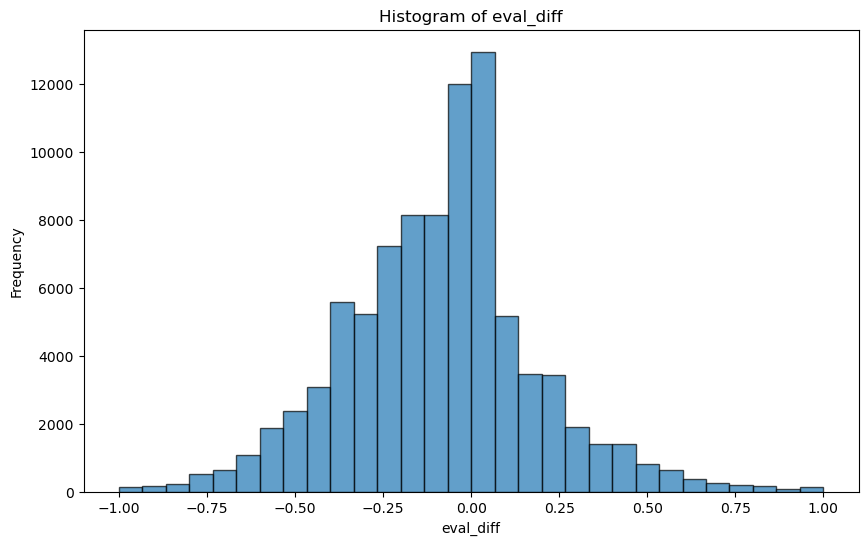

In [161]:
disagreement_df['eval_diff'] = disagreement_df['maia1200_eval'] - disagreement_df['leela10b2500_eval']
val_diff_counts = disagreement_df['eval_diff'].value_counts()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Specify the number of bins you want (e.g., 20 for more bins)
num_bins = 30

plt.hist(disagreement_df['eval_diff'], bins=num_bins, edgecolor='k', alpha=0.7)
plt.xlabel('eval_diff')
plt.ylabel('Frequency')
plt.title('Histogram of eval_diff')

plt.show()

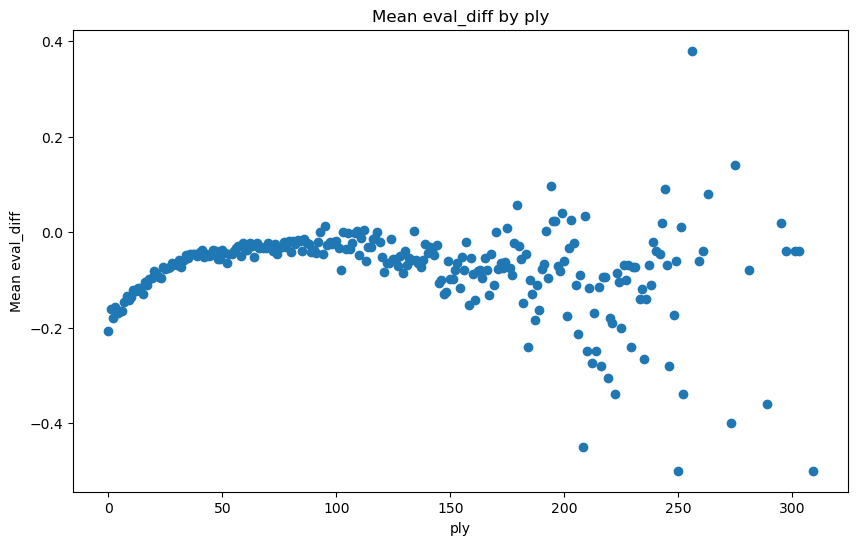

In [162]:
mean_eval_diff_by_ply = disagreement_df.groupby('ply')['eval_diff'].mean().reset_index()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(mean_eval_diff_by_ply['ply'], mean_eval_diff_by_ply['eval_diff'], marker='o', linestyle='')
plt.xlabel('ply')
plt.ylabel('Mean eval_diff')
plt.title('Mean eval_diff by ply')
plt.show()

In [163]:
board_feats_disagreements['eval_diff'] = disagreement_df['eval_diff']
correlation_matrix_feats = board_feats_disagreements.corr()
for col, series in board_feats_disagreements.iteritems():
    if col not in ['maia1200_eval', 'leela10b2500_eval', 'eval_diff']:
        print(
            f"Correlation between {col} and eval difference: {correlation_matrix_feats.loc['eval_diff', col].__round__(3)}")

Correlation between color and eval difference: 0.007
Correlation between move_num and eval difference: -0.004
Correlation between legal_moves_player and eval difference: 0.004
Correlation between legal_moves_opponent and eval difference: -0.004
Correlation between legal_captures_player and eval difference: -0.001
Correlation between legal_captures_opponent and eval difference: -0.004
Correlation between in_check and eval difference: -0.014
Correlation between check_to_give_player and eval difference: 0.001
Correlation between check_to_give_opponent and eval difference: -0.005
Correlation between queen_threatened_player and eval difference: -0.009
Correlation between queen_threatened_opponent and eval difference: -0.001
Correlation between castling_rights_player and eval difference: -0.005
Correlation between castling_rights_opponent and eval difference: 0.007
Correlation between enough_material_to_win_player and eval difference: -0.01
Correlation between enough_material_to_win_opponent

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_2522/962654341.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in board_feats_disagreements.iteritems():


Now, we'll perform PCA. First, we'll check the lowest dimension which preserves 95% of the variance, then check what features are most important.

In [171]:
board_feats_disagreements = pd.read_csv("../disagreement_df.csv")

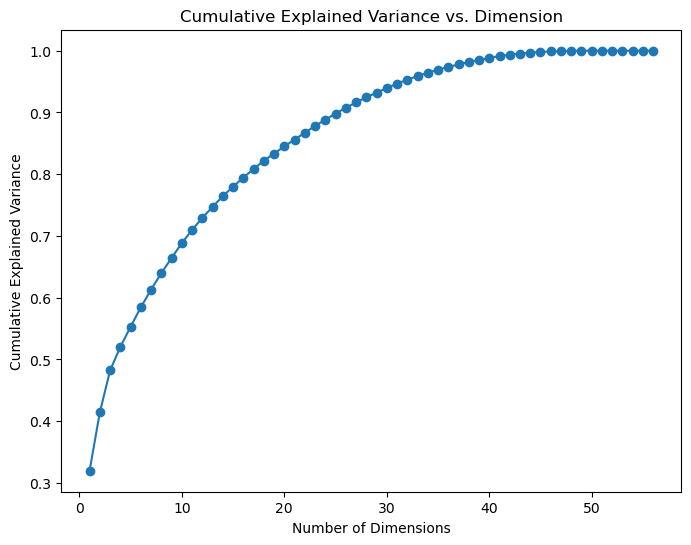

Number of dimensions needed to preserve 95% of variance is 31


In [175]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
board_transformed = imputer.fit_transform(board_feats_disagreements)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(board_transformed)
pca = PCA()
pca.fit(scaled_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance vs. Dimension')
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.show()
for i, n in enumerate(cumulative_variance):
    if n > 0.95:
        print(f"Number of dimensions needed to preserve 95% of variance is {i}")
        break

In [185]:
pca = PCA(n_components=31)
X_transformed = pca.fit_transform(board_transformed)
principal_components = pca.components_
feature_means_in_pcs = principal_components.mean(axis=0)
feature_mean_df = pd.DataFrame({'Feature': board_feature_names, 'Mean in PCs': feature_means_in_pcs})
first_pc = pd.DataFrame({'Feature': board_feature_names, 'PC': principal_components[0]})
print('First PC:')
print(f'{first_pc}\n')
sorted_feature_mean_df = feature_mean_df.sort_values(by='Mean in PCs', ascending=False)
print('Features sorted in order of importance:')
print(sorted_feature_mean_df)

First PC:
                                Feature        PC
0                                 color -0.000189
1                              move_num  0.845369
2                    legal_moves_player -0.207422
3                  legal_moves_opponent -0.215036
4                 legal_captures_player -0.023494
5               legal_captures_opponent -0.020378
6                              in_check  0.001485
7                  check_to_give_player  0.002249
8                check_to_give_opponent  0.003011
9               queen_threatened_player -0.000698
10            queen_threatened_opponent -0.000244
11               castling_rights_player -0.001572
12             castling_rights_opponent -0.002137
13        enough_material_to_win_player  0.000528
14      enough_material_to_win_opponent  0.000444
15                 number_pieces_player -0.086898
16               number_pieces_opponent -0.096105
17               materiel_points_player -0.259694
18             material_points_opponent 

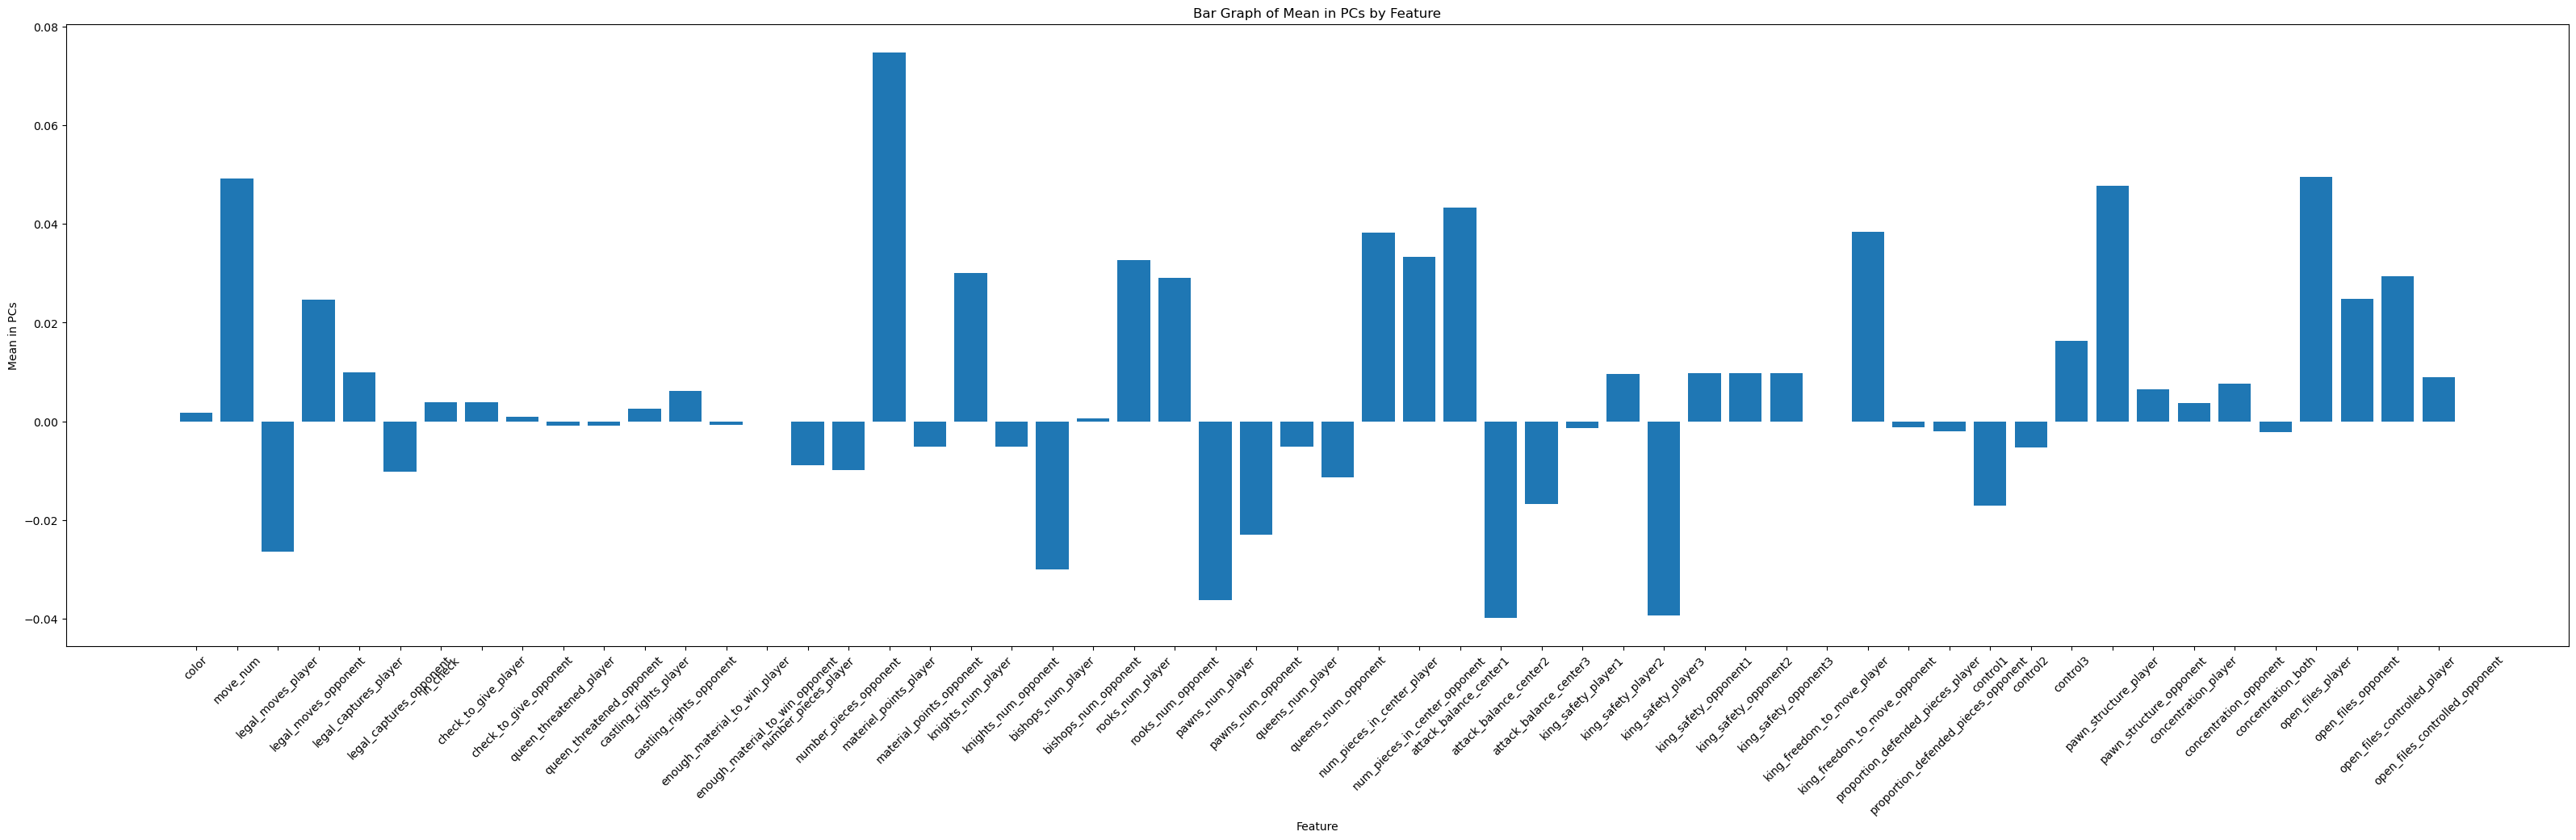

In [186]:
plt.figure(figsize=(40, 10))
plt.bar(feature_mean_df['Feature'], feature_mean_df['Mean in PCs'])

plt.xlabel('Feature')
plt.ylabel('Mean in PCs')
plt.title('Bar Graph of Mean in PCs by Feature')

plt.xticks(rotation=45)
plt.show()

PCA with dimension of 1:

In [181]:
pca = PCA(n_components=1)
X_n1 = pca.fit_transform(board_transformed)
principal_components = pca.components_
feature_means_in_pcs = principal_components.mean(axis=0)
feature_mean_df = pd.DataFrame({'Feature': board_feature_names, 'Mean in PCs': feature_means_in_pcs})
sorted_feature_mean_df = feature_mean_df.sort_values(by='Mean in PCs', ascending=False)
print('Features sorted in order of importance:')
print(sorted_feature_mean_df)

Features sorted in order of importance:
                                Feature  Mean in PCs
1                              move_num     0.845369
53                  open_files_opponent     0.047283
52                    open_files_player     0.040521
38                king_safety_opponent2     0.023048
37                king_safety_opponent1     0.023048
39                king_safety_opponent3     0.023048
35                  king_safety_player2     0.022697
41        king_freedom_to_move_opponent     0.016598
34                  king_safety_player1     0.010540
8                check_to_give_opponent     0.003011
7                  check_to_give_player     0.002249
50               concentration_opponent     0.001801
6                              in_check     0.001485
13        enough_material_to_win_player     0.000528
14      enough_material_to_win_opponent     0.000444
49                 concentration_player     0.000106
40          king_freedom_to_move_player     0.000000
0     

PCA with dimension of 2:

In [184]:
pca = PCA(n_components=2)
X_n1 = pca.fit_transform(board_transformed)
principal_components = pca.components_
feature_means_in_pcs = principal_components.mean(axis=0)
feature_mean_df = pd.DataFrame({'Feature': board_feature_names, 'Mean in PCs': feature_means_in_pcs})
sorted_feature_mean_df = feature_mean_df.sort_values(by='Mean in PCs', ascending=False)
print('Features sorted in order of importance:')
print(sorted_feature_mean_df)

Features sorted in order of importance:
                                Feature  Mean in PCs
1                              move_num     0.650295
2                    legal_moves_player     0.175876
44                             control1     0.127839
46                             control3     0.075315
3                  legal_moves_opponent     0.069121
45                             control2     0.057002
31               attack_balance_center1     0.042646
38                king_safety_opponent2     0.040873
39                king_safety_opponent3     0.040873
37                king_safety_opponent1     0.040873
33               attack_balance_center3     0.028754
53                  open_files_opponent     0.028136
52                    open_files_player     0.027817
32               attack_balance_center2     0.019170
35                  king_safety_player2     0.018765
34                  king_safety_player1     0.017040
4                 legal_captures_player     0.015603
54    

Linear regression model trained with the PCs:

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = disagreement_df['eval_diff']
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse.__round__(3)}")
print(f"R-squared: {r2.__round__(3)}")

Mean Squared Error: 0.069
R-squared: 0.042


Using CART:

In [183]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse.__round__(3)}")

Mean Squared Error: 0.142
